<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_02_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 02 - Self-Organizing Map (SOM)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 2 – APRENDIZADO NÃO SUPERVISIONADO

1. Selecionar pelo menos dois datasets:

2. Aplicar um modelo neural não supervisionado

3. Avaliar os padrões detectados em cada conjunto:

4. Clusters / outliers, etc.

5. Avaliar a homogeneidade dos agrupamentos

6. Variar os parâmetros do modelo (grid, taxas ($\sigma$), número
de neurônios, etc.)



# Introdução 

In this notebooks I will present the unsupervised learning process of Self Organize Maping (SOM). Unsupervised learning is based on 4 principles of self-organization. In the particular case of SOM, a learning map is built in which the network of neurons will compete with each other. This process is known as competitive learning.


This experiment uses the `minisom` library available on [Github](https://github.com/JustGlowing/minisom) and used its examples to plot its graphs.

For a deeper understanding of how the algorithm works I recommend reading [wikipedia](https://en.wikipedia.org/wiki/Self-organizing_map).


We will explore the performance of the SOM network in the clustering of some datasets by varying some parameters of the network. A more exhaustive study of the network performance can still be better explored and some questions are still open.

The parameters that we will explore will be

* Neighborhood Decay $\sigma$ 
* Learning rate $\eta(t)$
* Map topology _grid_

We variete this parameter in order to easly vizualize they impact in the SOM learning building a 3x3 analyse.We also fix the 

$$ 
h_{j,i(x)} =  \exp  \left(-\frac{d^2_{j,i}}{2\sigma^2}  \right) 
$$

$$
\sigma(n) = \sigma_0 \exp \left(-\frac{n}{\tau} \right)
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif">


# 1- Iris dataset

<img src="https://miro.medium.com/max/1000/1*nfK3vGZkTa4GrO7yWpcS-Q.png">

The dataset consists of 50 samples from each of the three Iris species (Iris setosa, Iris virginica and Iris versicolor). Four variables were measured in each sample: the length and width of the sepals and petals, in centimeters. Based on the combination of these four characteristics, Fisher developed a linear discriminant model to distinguish species from one another.

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
import matplotlib.gridspec as gridspec
#import matplotlib.gridspec as gridspec
#from plotnine import *
import sys
sys.path.insert(0, '../')

## Pre-Processing

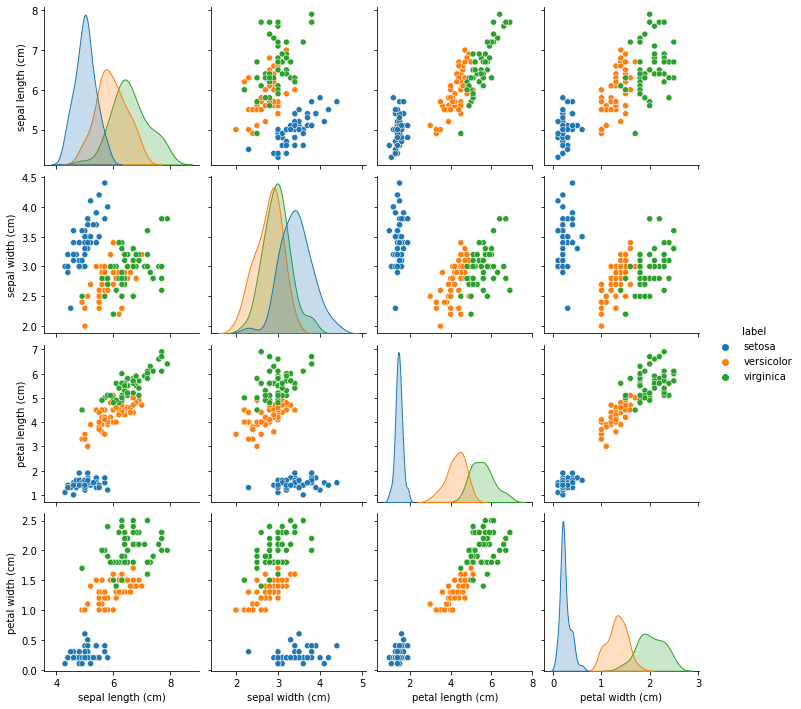

In [ ]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = [iris.target_names[i] for i in iris.target]
sns.pairplot(df, hue = 'label')

In [ ]:
features = df.drop(['label'], axis=1)
#Normaling data
scaler = MinMaxScaler() 
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
data = features
labels = df.label.unique()
instances = df['label'].unique()
instances.shape[0]
#Tranforming the data for numerical values
df['label'].replace(df['label'].unique(),
                        [0,1,2], inplace=True)
target = df['label'].values


Text(0.5, 1.0, 'Correation Map')

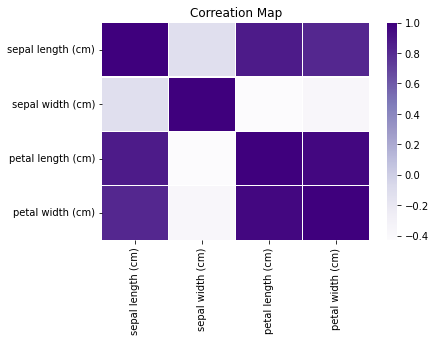

In [ ]:
sns.heatmap(features.astype(float).corr(), linewidths = 0.1, linecolor = 'white', cmap="Purples")
plt.title('Correation Map')

In [376]:
# Models Paramentes 🎛️
sigma          = [.01,0.1,1,10,100,
                  .01,0.1,1,10,100,
                  .01,0.1,1,10,100,
                  .01,0.1,1,10,100,
                  .01,0.1,1,10,100,]
learning_rate  = [.01,.01,.01,.01,.01,
                  .1 ,.1 ,.1 ,.1 ,.1,
                  0.5,0.5,0.5,0.5,0.5,
                  1  ,1  ,1  ,1  ,1  ,
                  10,10,10,10,10]
neighborhood_function = 'gaussian'
random_seed = 10
epochs = 5000

#Plor Paramenters 
color_map = 'Purples'
markers = ['*', 's', 'D','o',".",",","o","v","^","<",">","1","2","3","4","8","s","p","P",'*', 's', 'D','o',".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*"]
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

n_rows    = 5
n_columns = 5

fig_x = 22
fig_y = 22

## Som 3x3

Paramentets 🎛️

In [377]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 3, 3
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [378]:
som_iris33 = [] 
for i in range(len(sigma)):
  som_iris33.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_iris33[i].random_weights_init(data.values)
  som_iris33[i].train_random(data.values, epochs)

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2561: RuntimeWarning: overflow encountered in reduce
  return sqrt(add.reduce(s, axis=axis, keepdims=keepdims))
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/usr/local/lib/python3.7/dist-packages/minisom.py:338: RuntimeWarning: invalid value encountered in add
  self._weights += einsum('ij, ijk->ijk', g, x-self._weights)


Hitmap

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


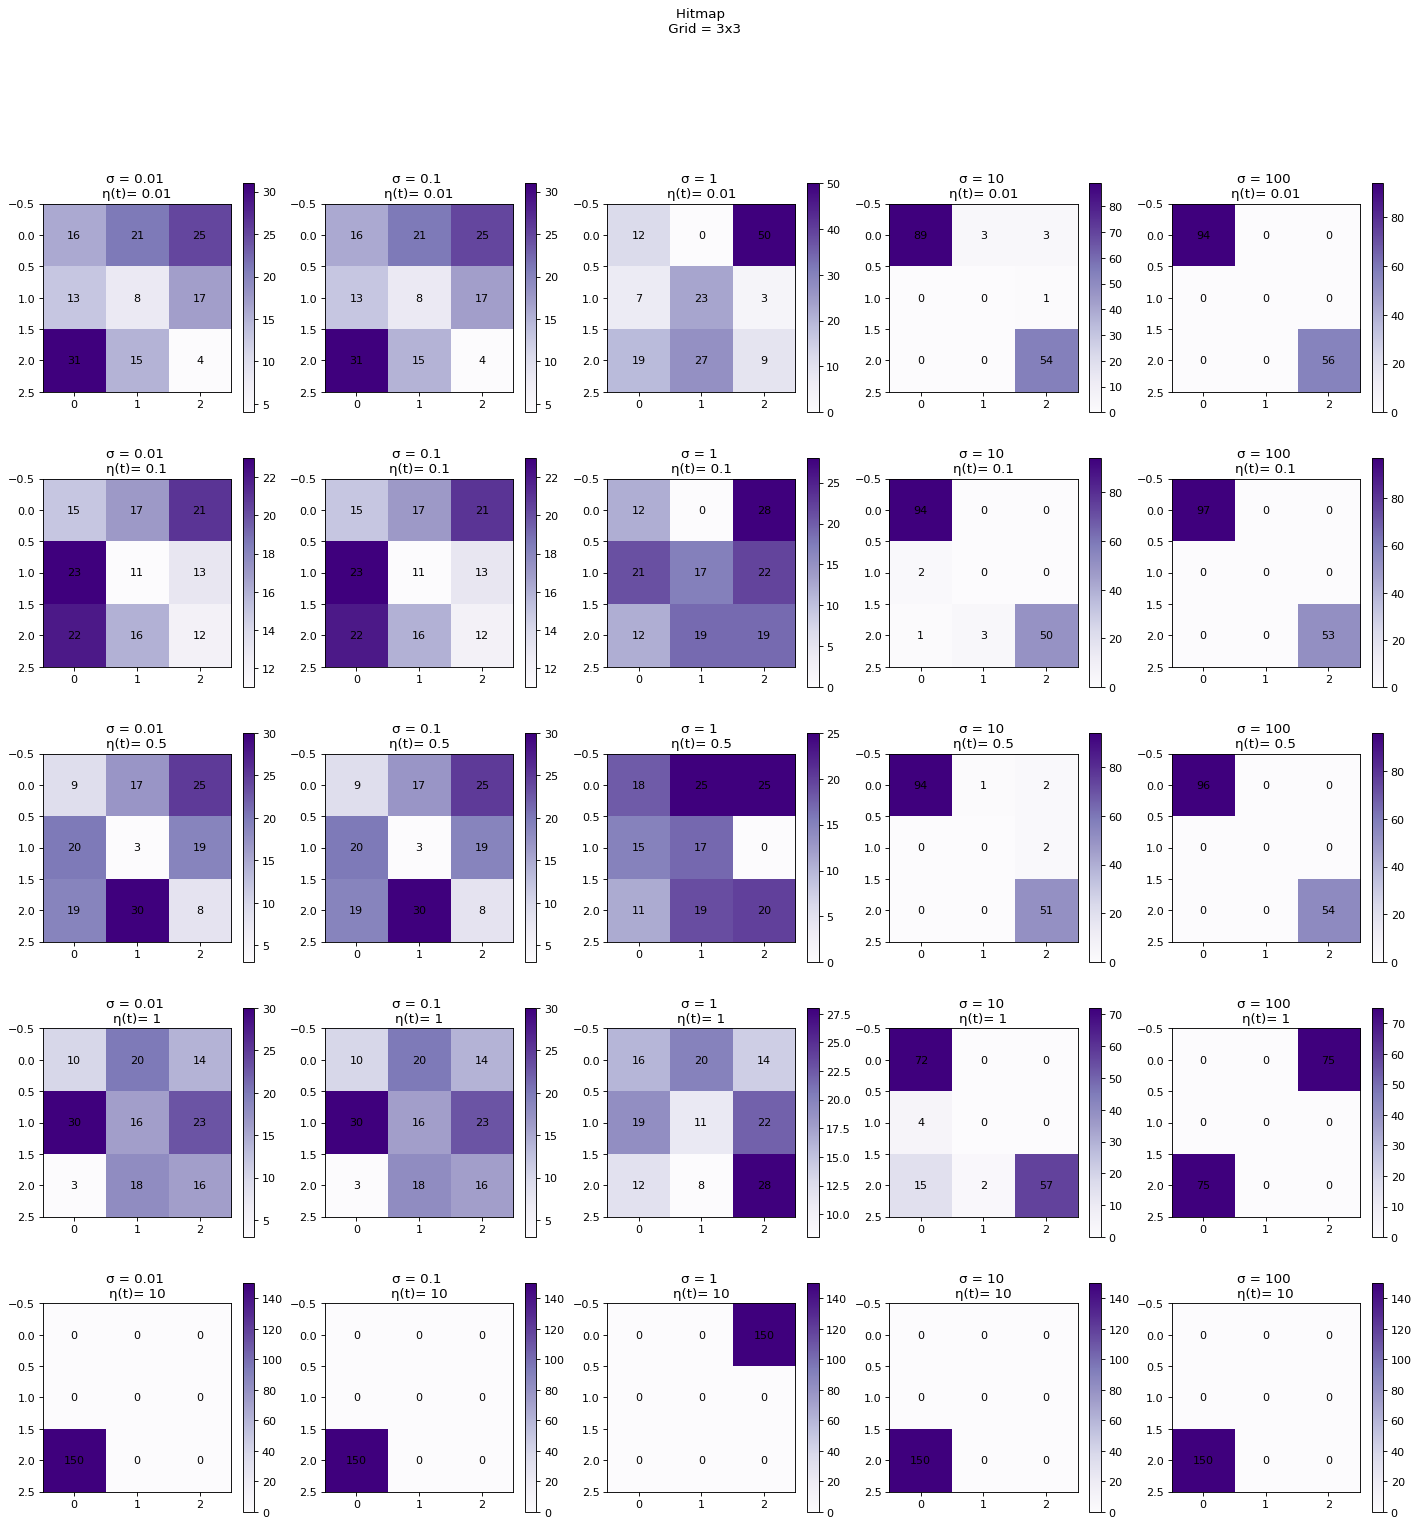

In [379]:
#i = 0 
figure( figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris33[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
plt.show()

### U-Matrix

/usr/local/lib/python3.7/dist-packages/minisom.py:491: RuntimeWarning: invalid value encountered in true_divide
  return um/um.max()


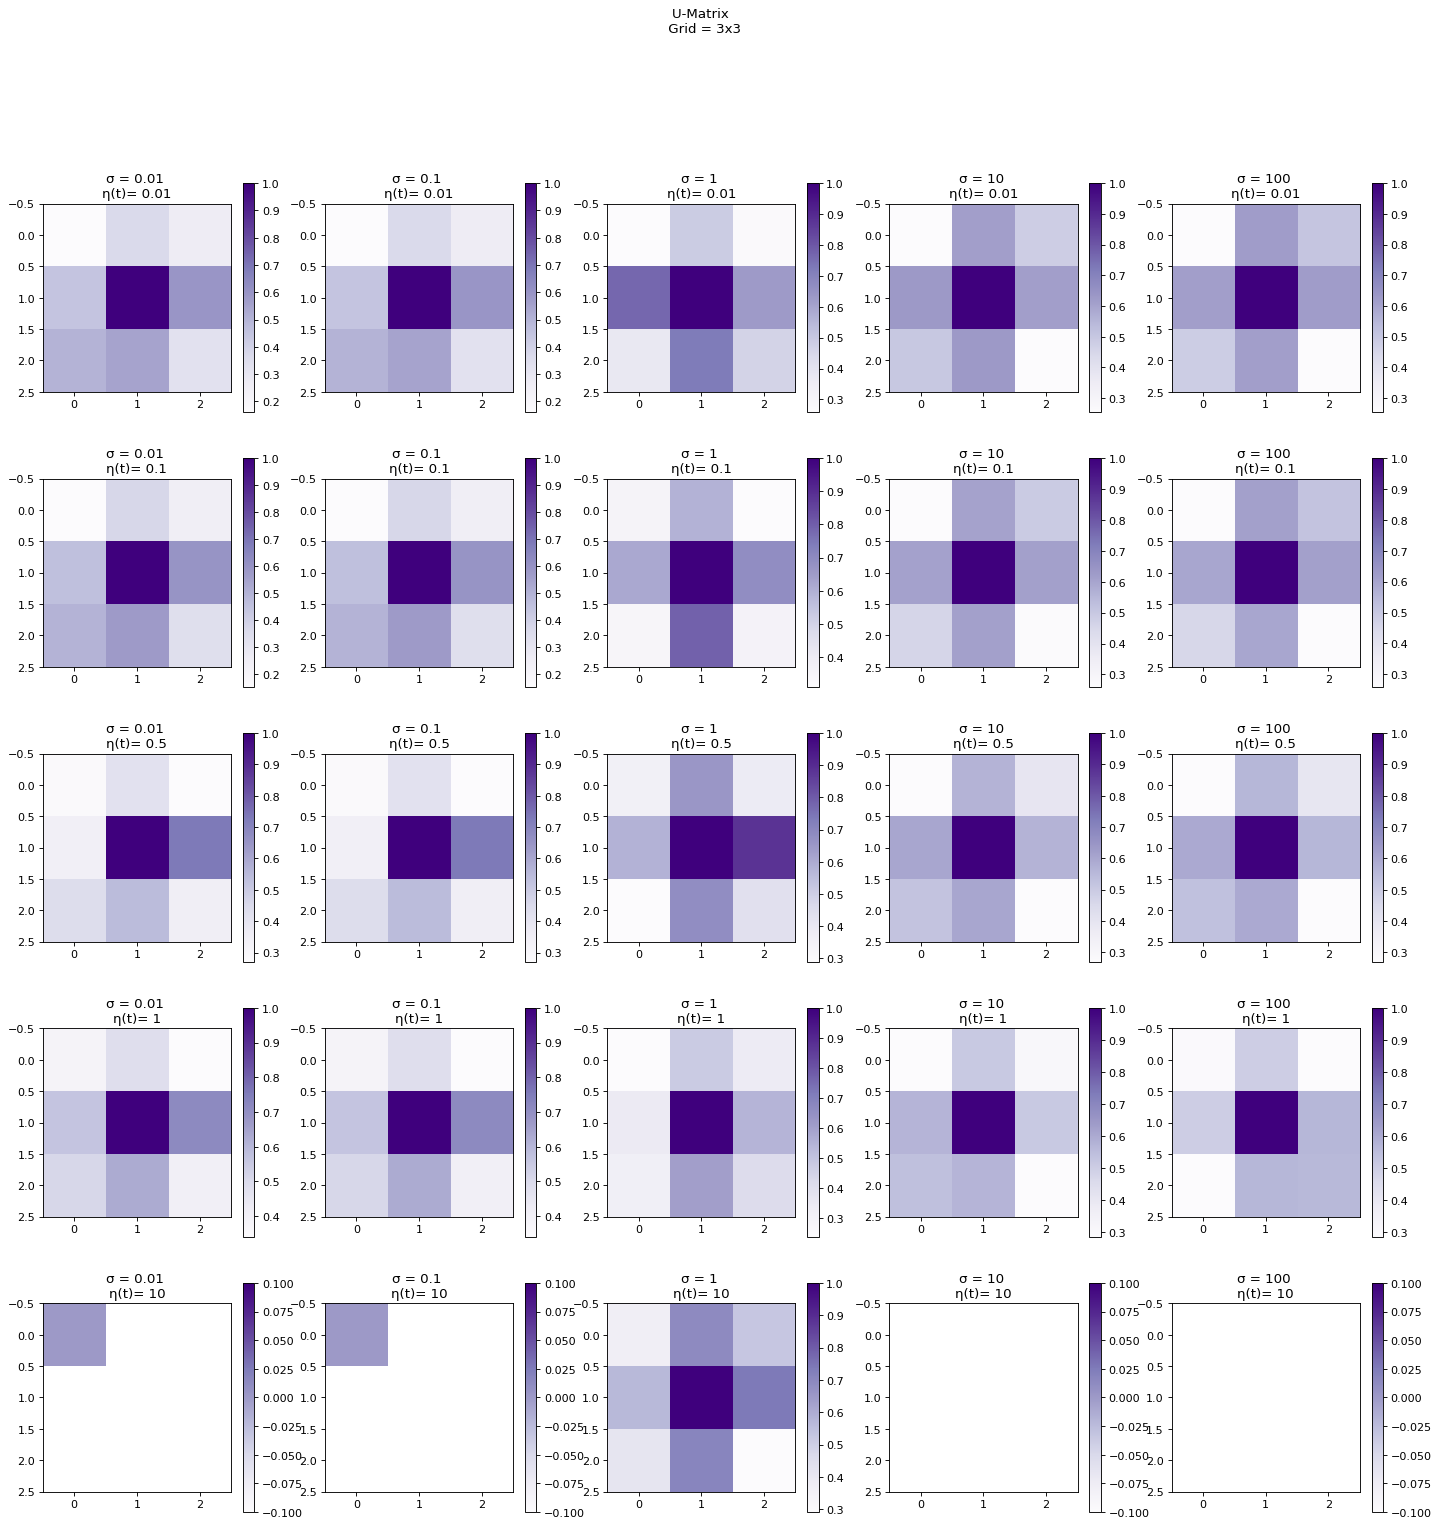

In [380]:
#i = 0 
figure( figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris33[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

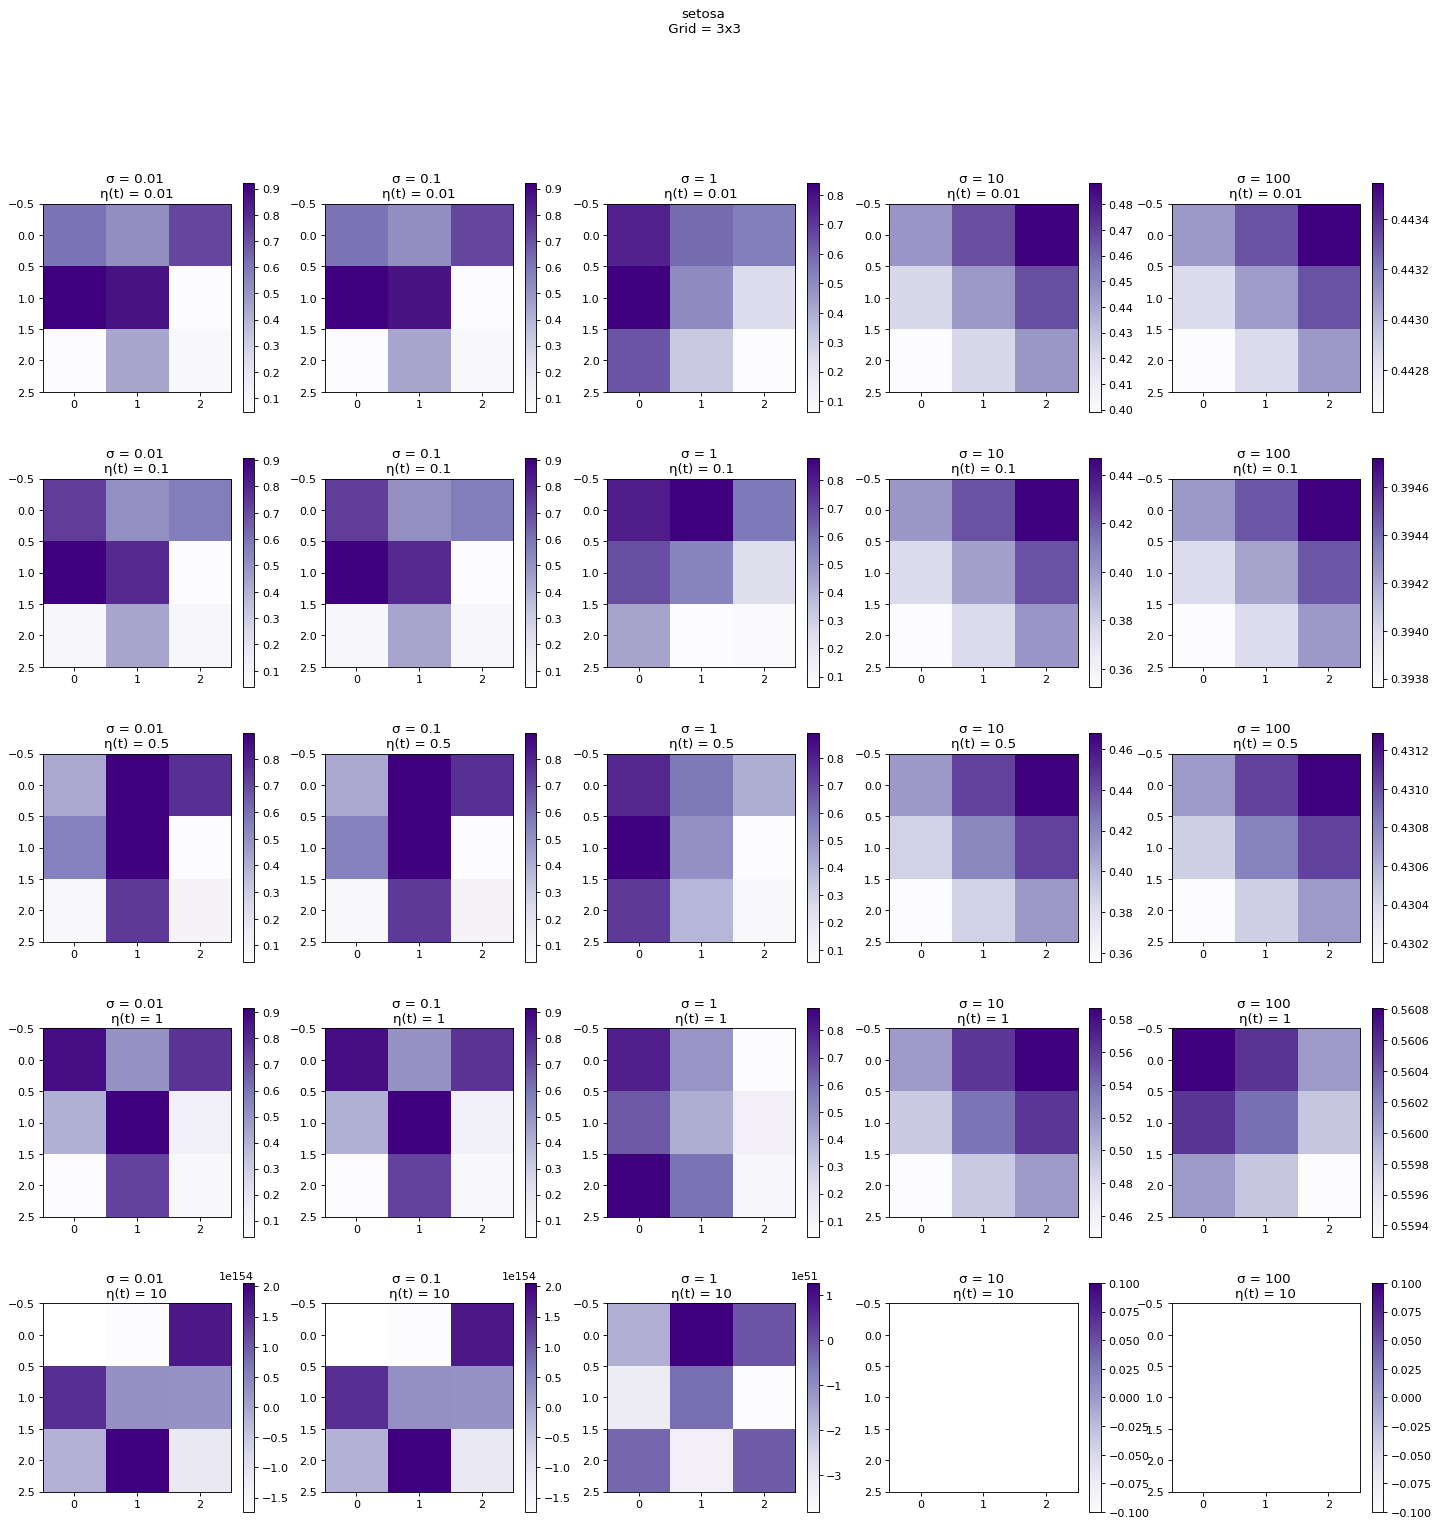

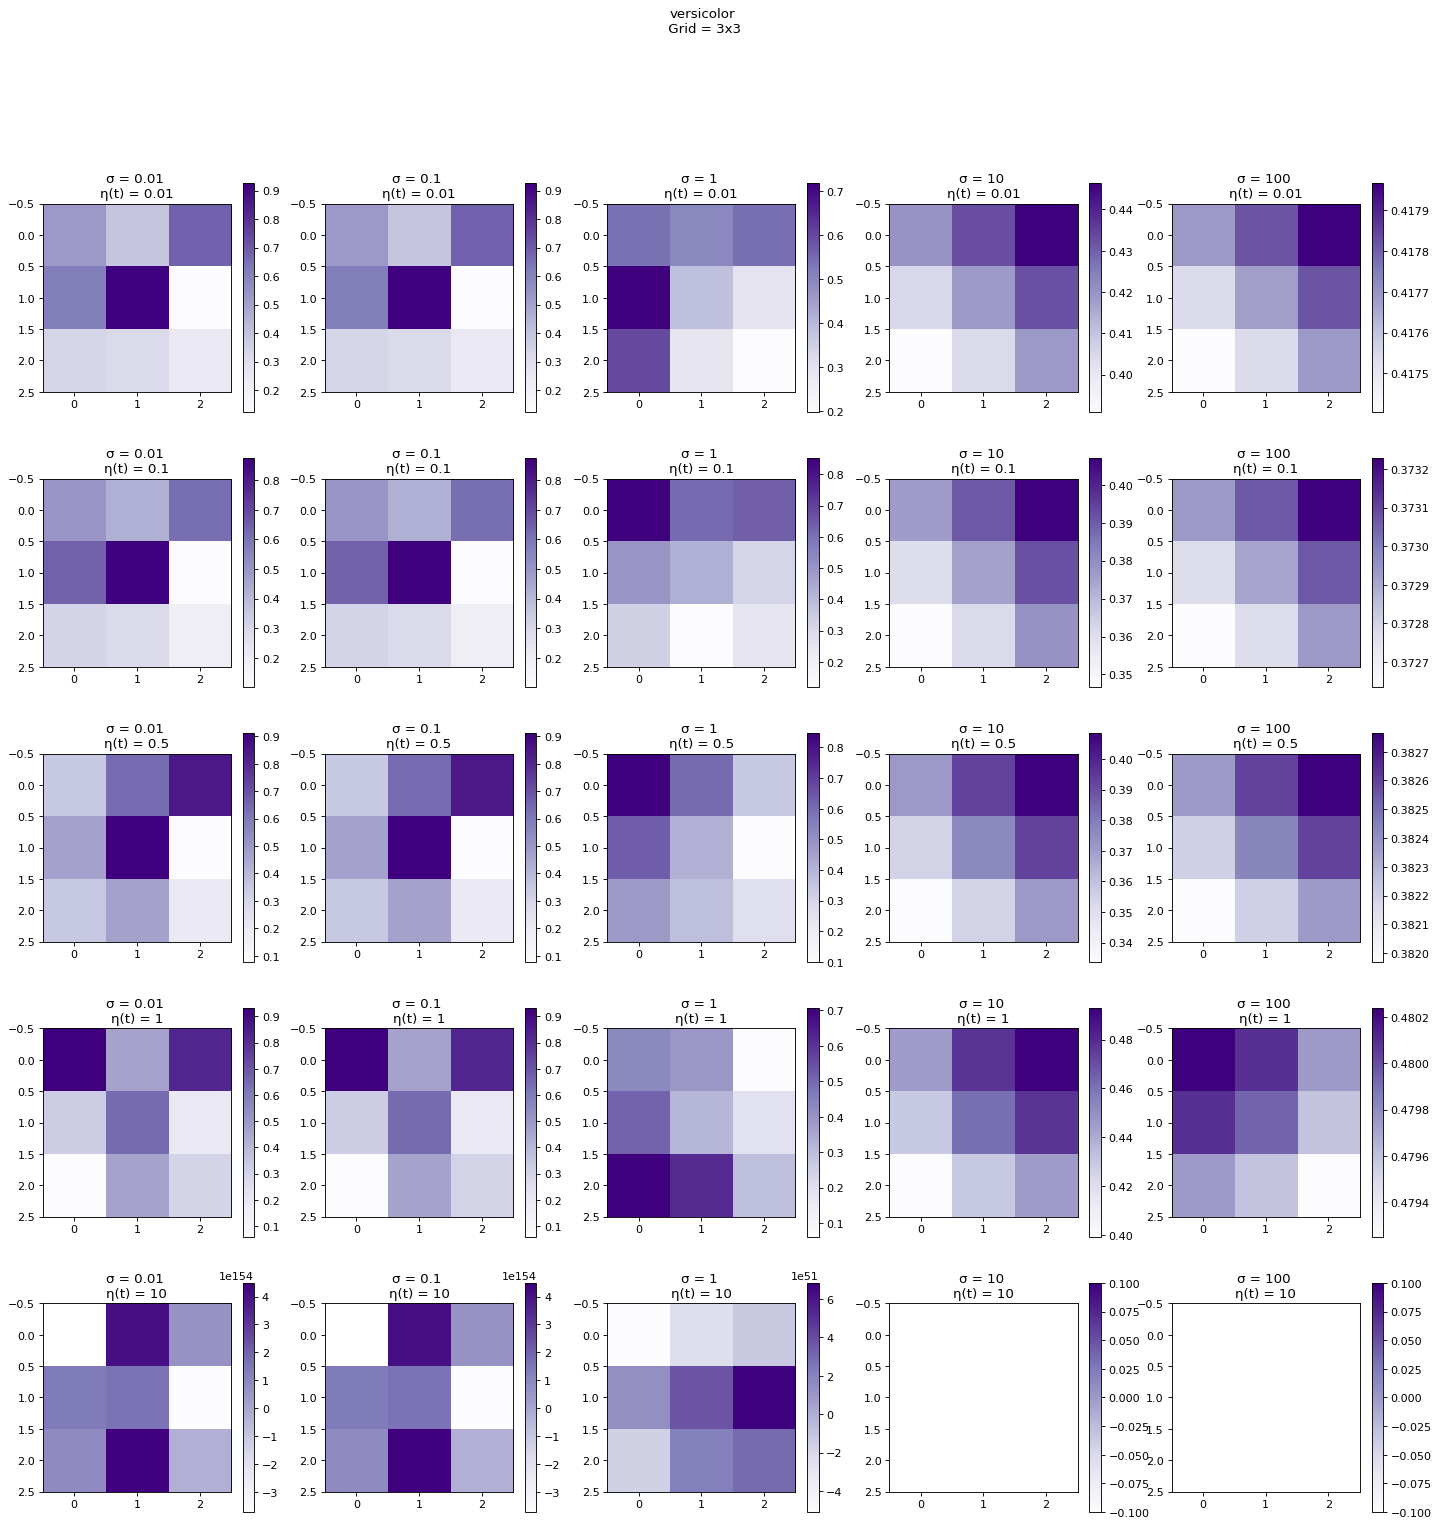

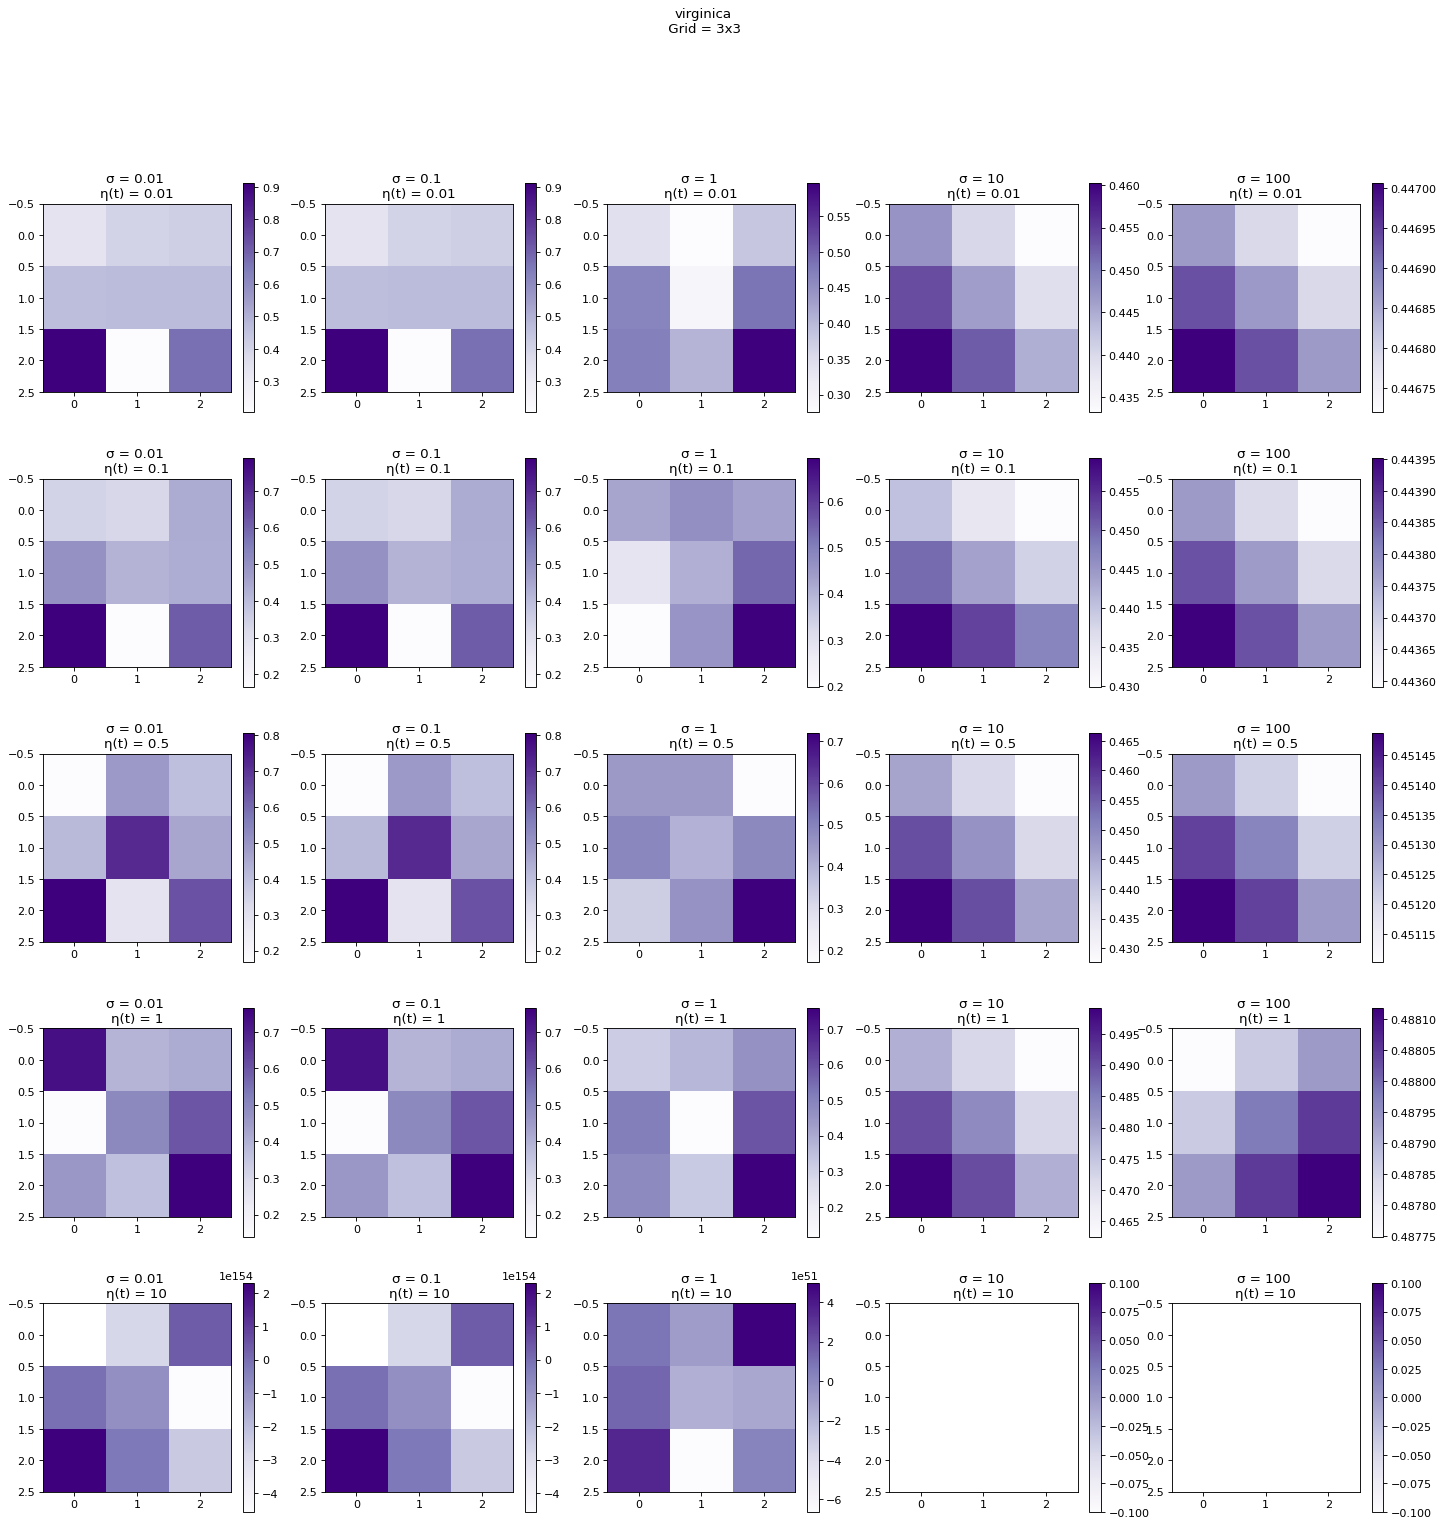

In [381]:
for l in range(len(labels)):
  figure( figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_iris33[k]
    weights = som.get_weights()

    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



<Figure size 960x960 with 0 Axes>

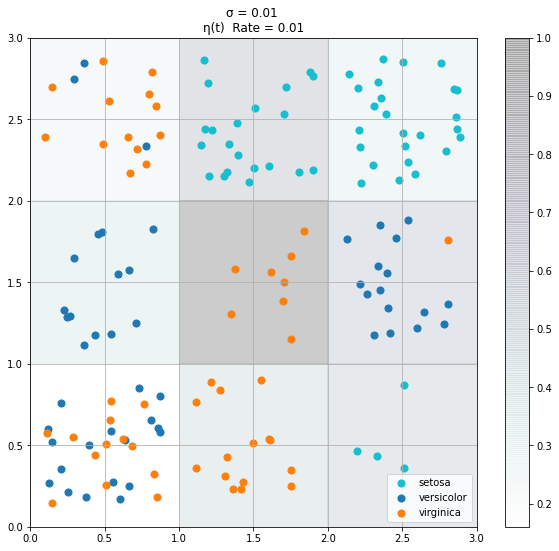

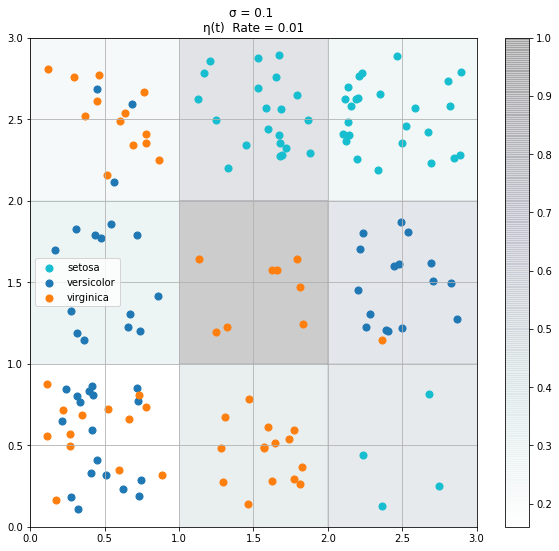

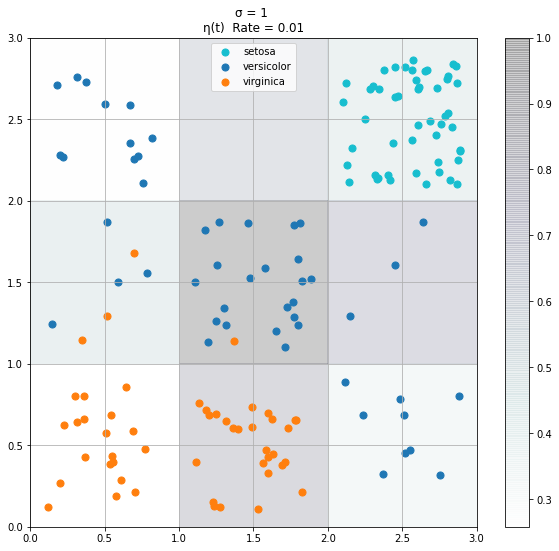

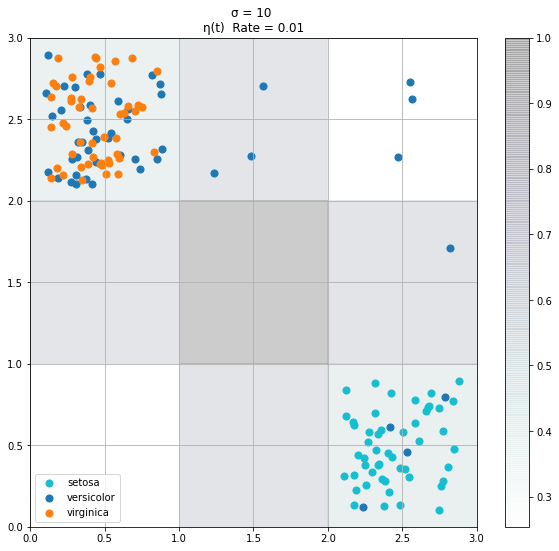

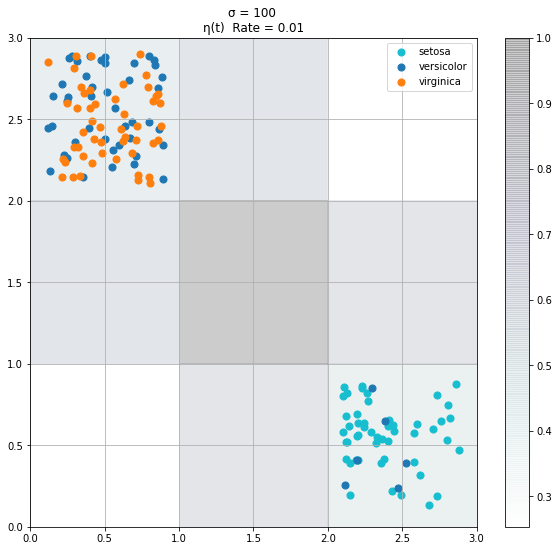

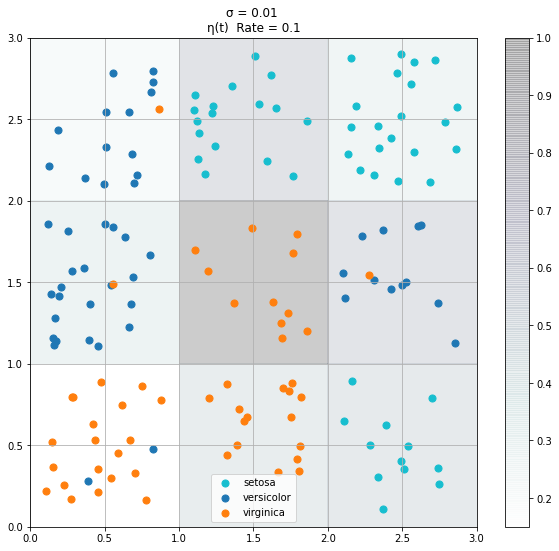

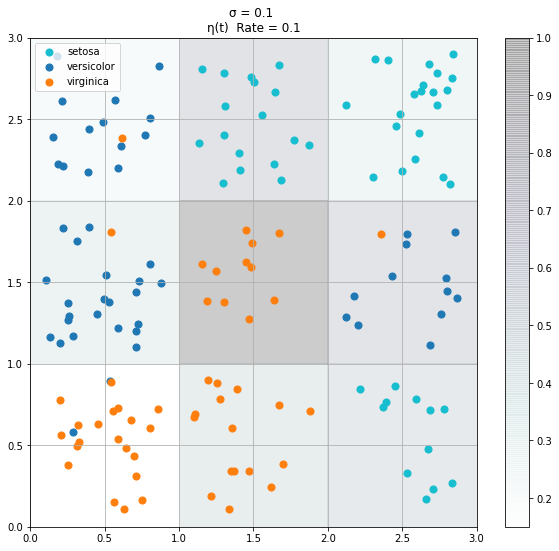

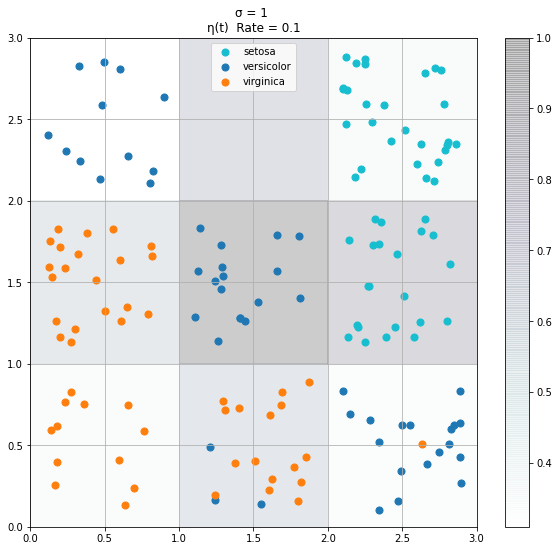

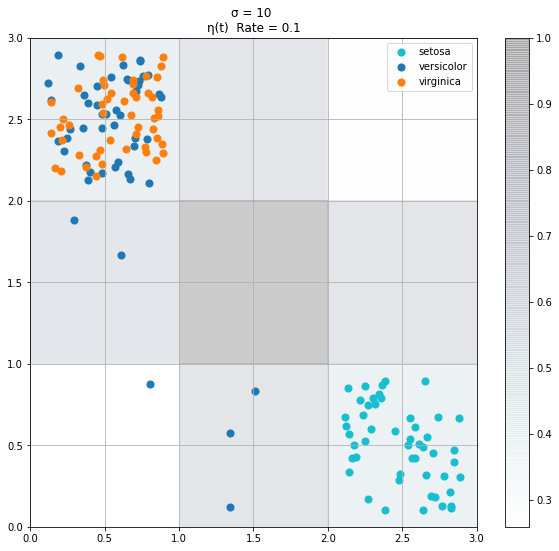

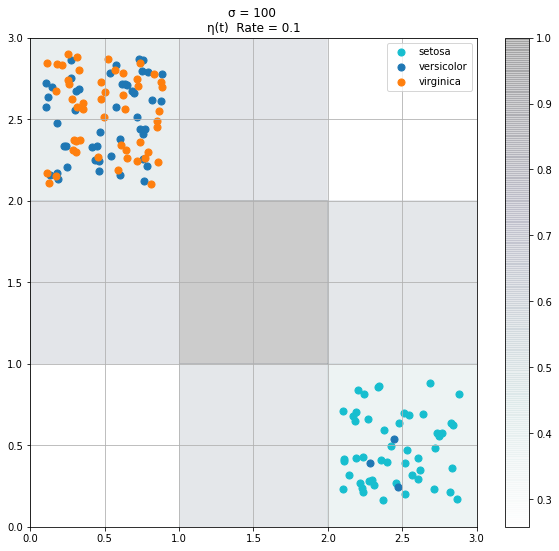

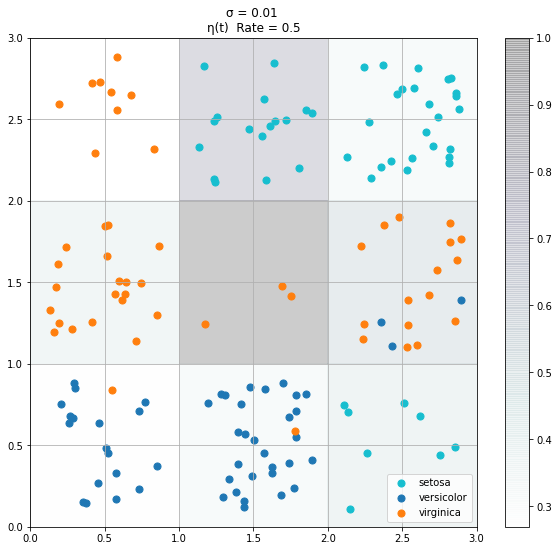

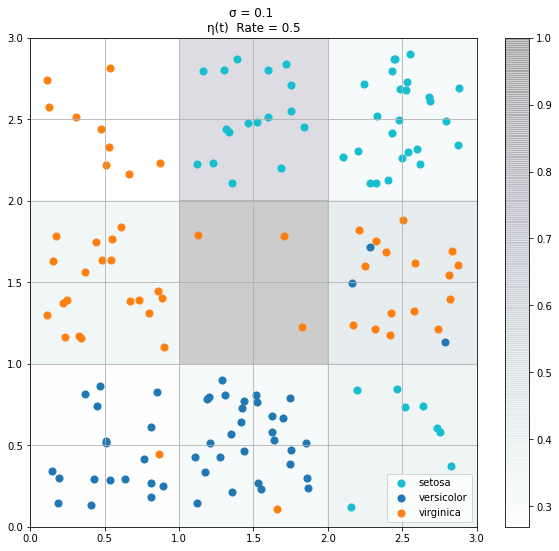

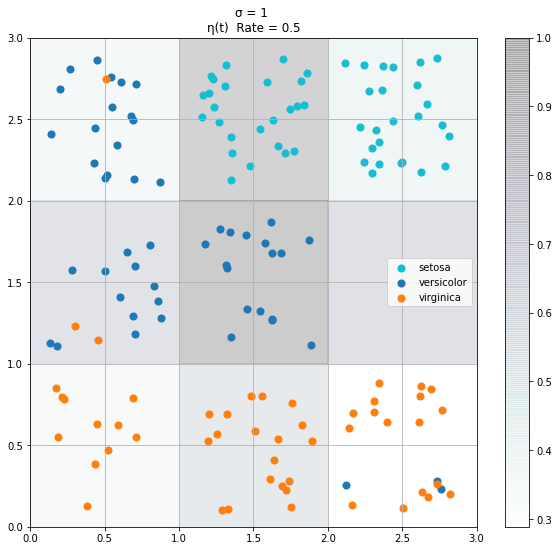

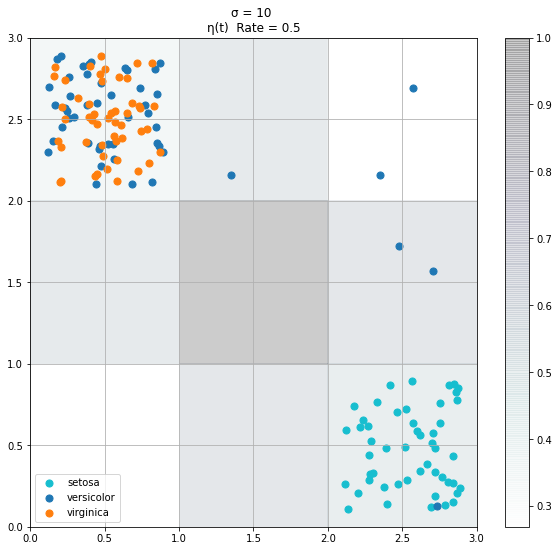

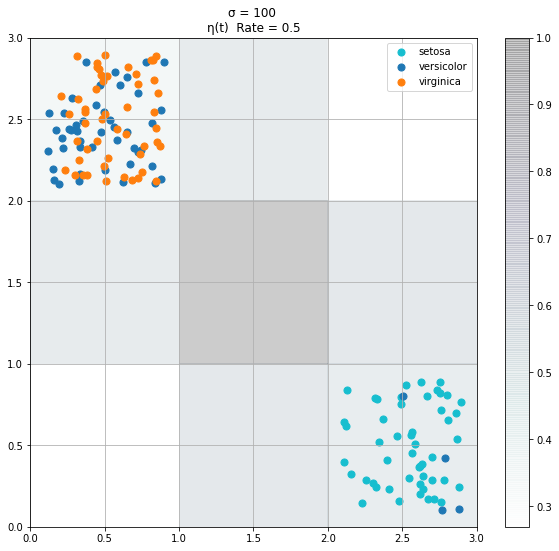

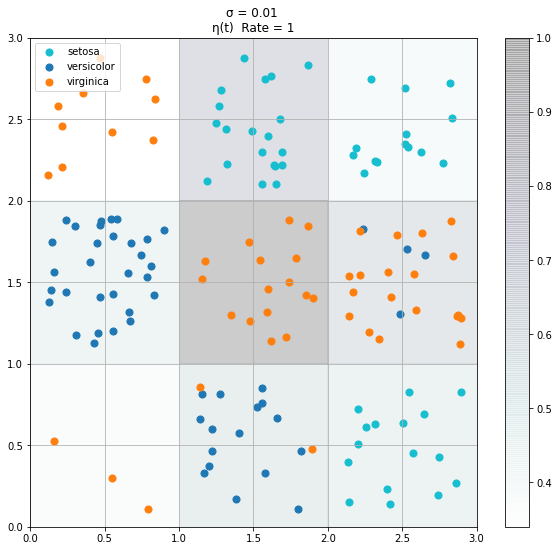

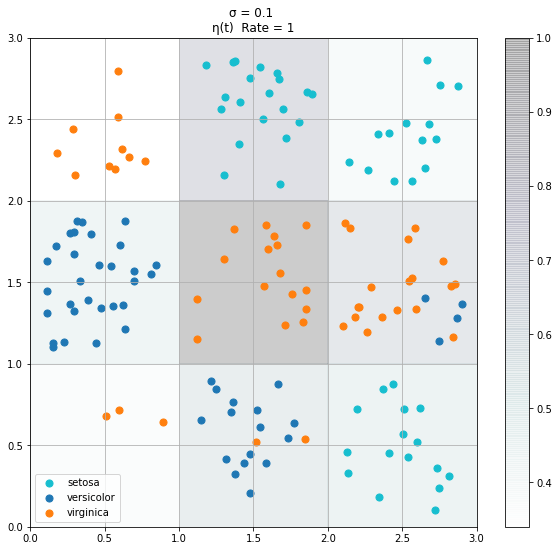

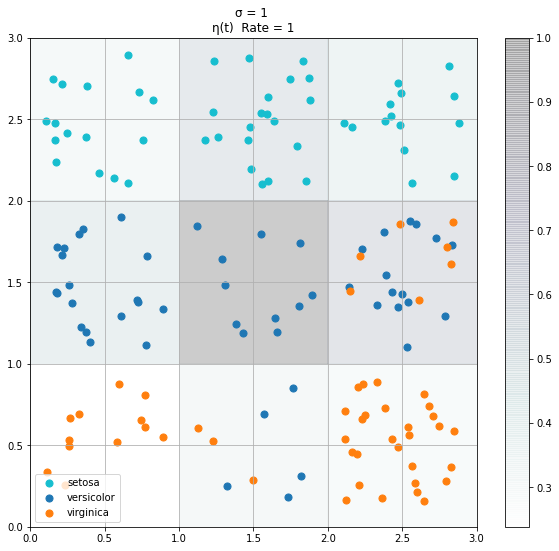

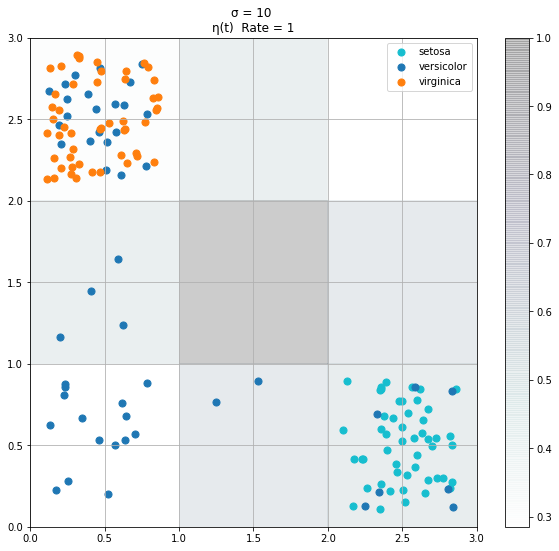

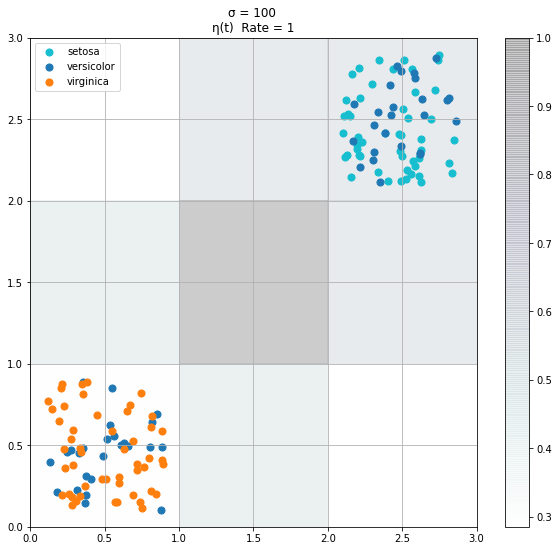

/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real
/usr/local/lib/python3.7/dist-packages/minisom.py:491: RuntimeWarning: invalid value encountered in true_divide
  return um/um.max()


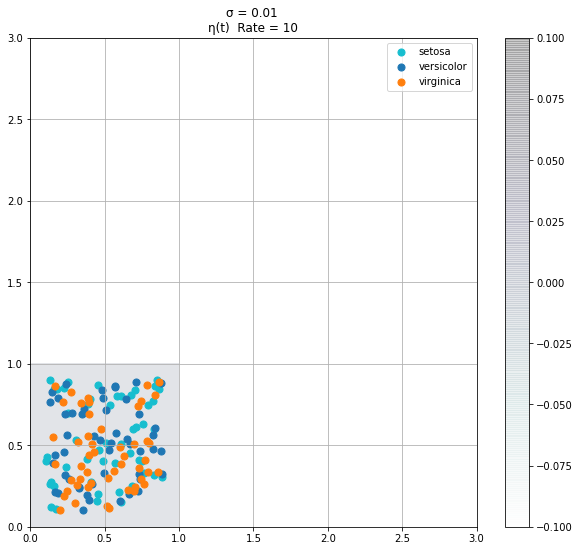

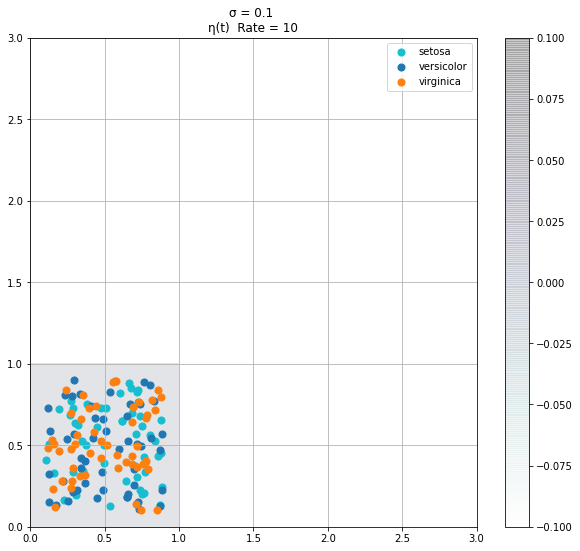

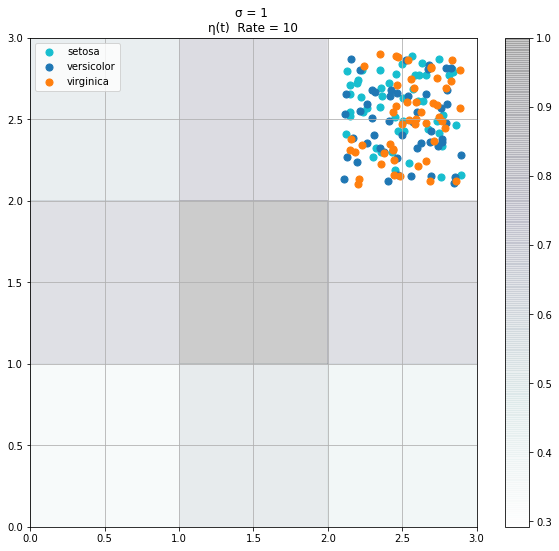

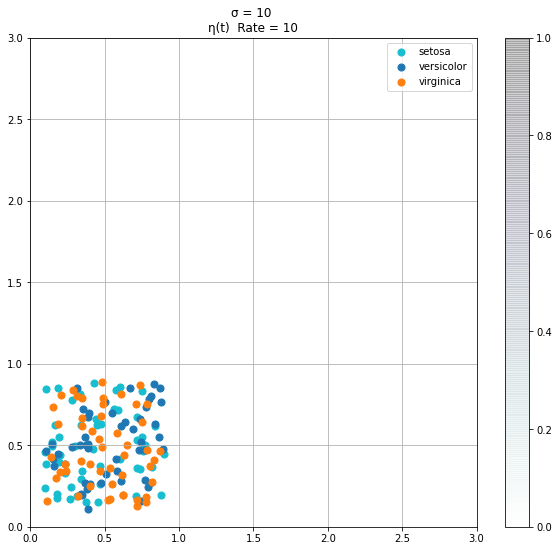

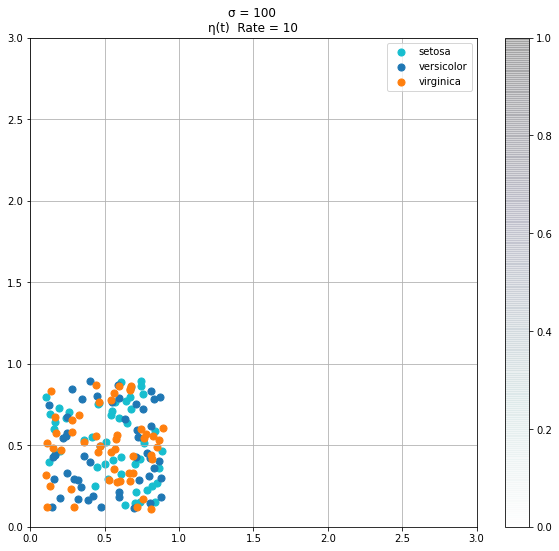

In [382]:
figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris33[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, 
                  c=colors[c-1], 
                  label=label_names[c]
                  )
  plt.legend()#loc='upper right')
  plt.grid()
  plt.title('σ = '+str(sigma[k])+' \nη(t)  Rate = '+str(learning_rate[k]))
  plt.show()

### SOM Map

/usr/local/lib/python3.7/dist-packages/minisom.py:491: RuntimeWarning: invalid value encountered in true_divide
  return um/um.max()
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2560: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


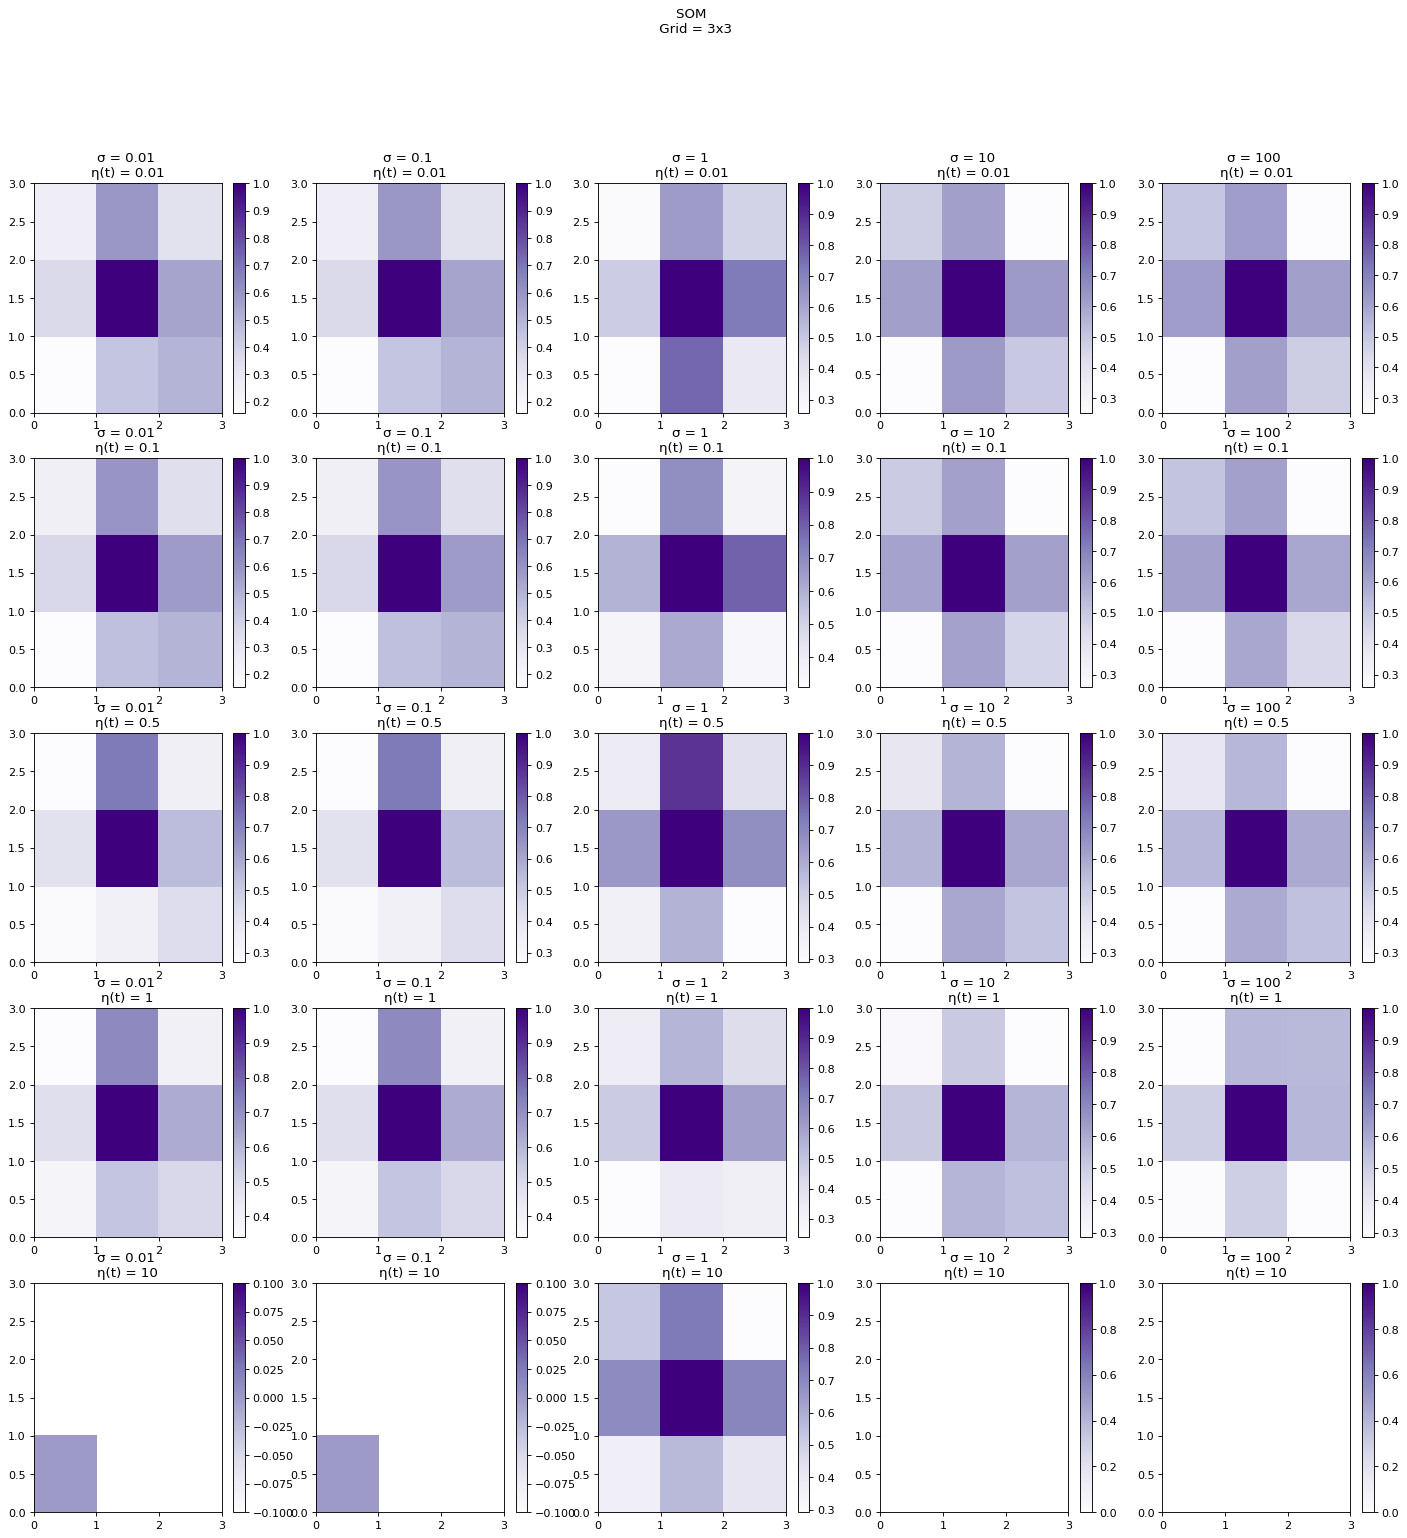

In [383]:
figure( figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_iris33[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,
               #markers[target[cnt]-1],
               markerfacecolor='None',
               markeredgecolor=colors[target[cnt]-1],
               markersize=12, 
               markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### Erros Avaliation

/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + inp

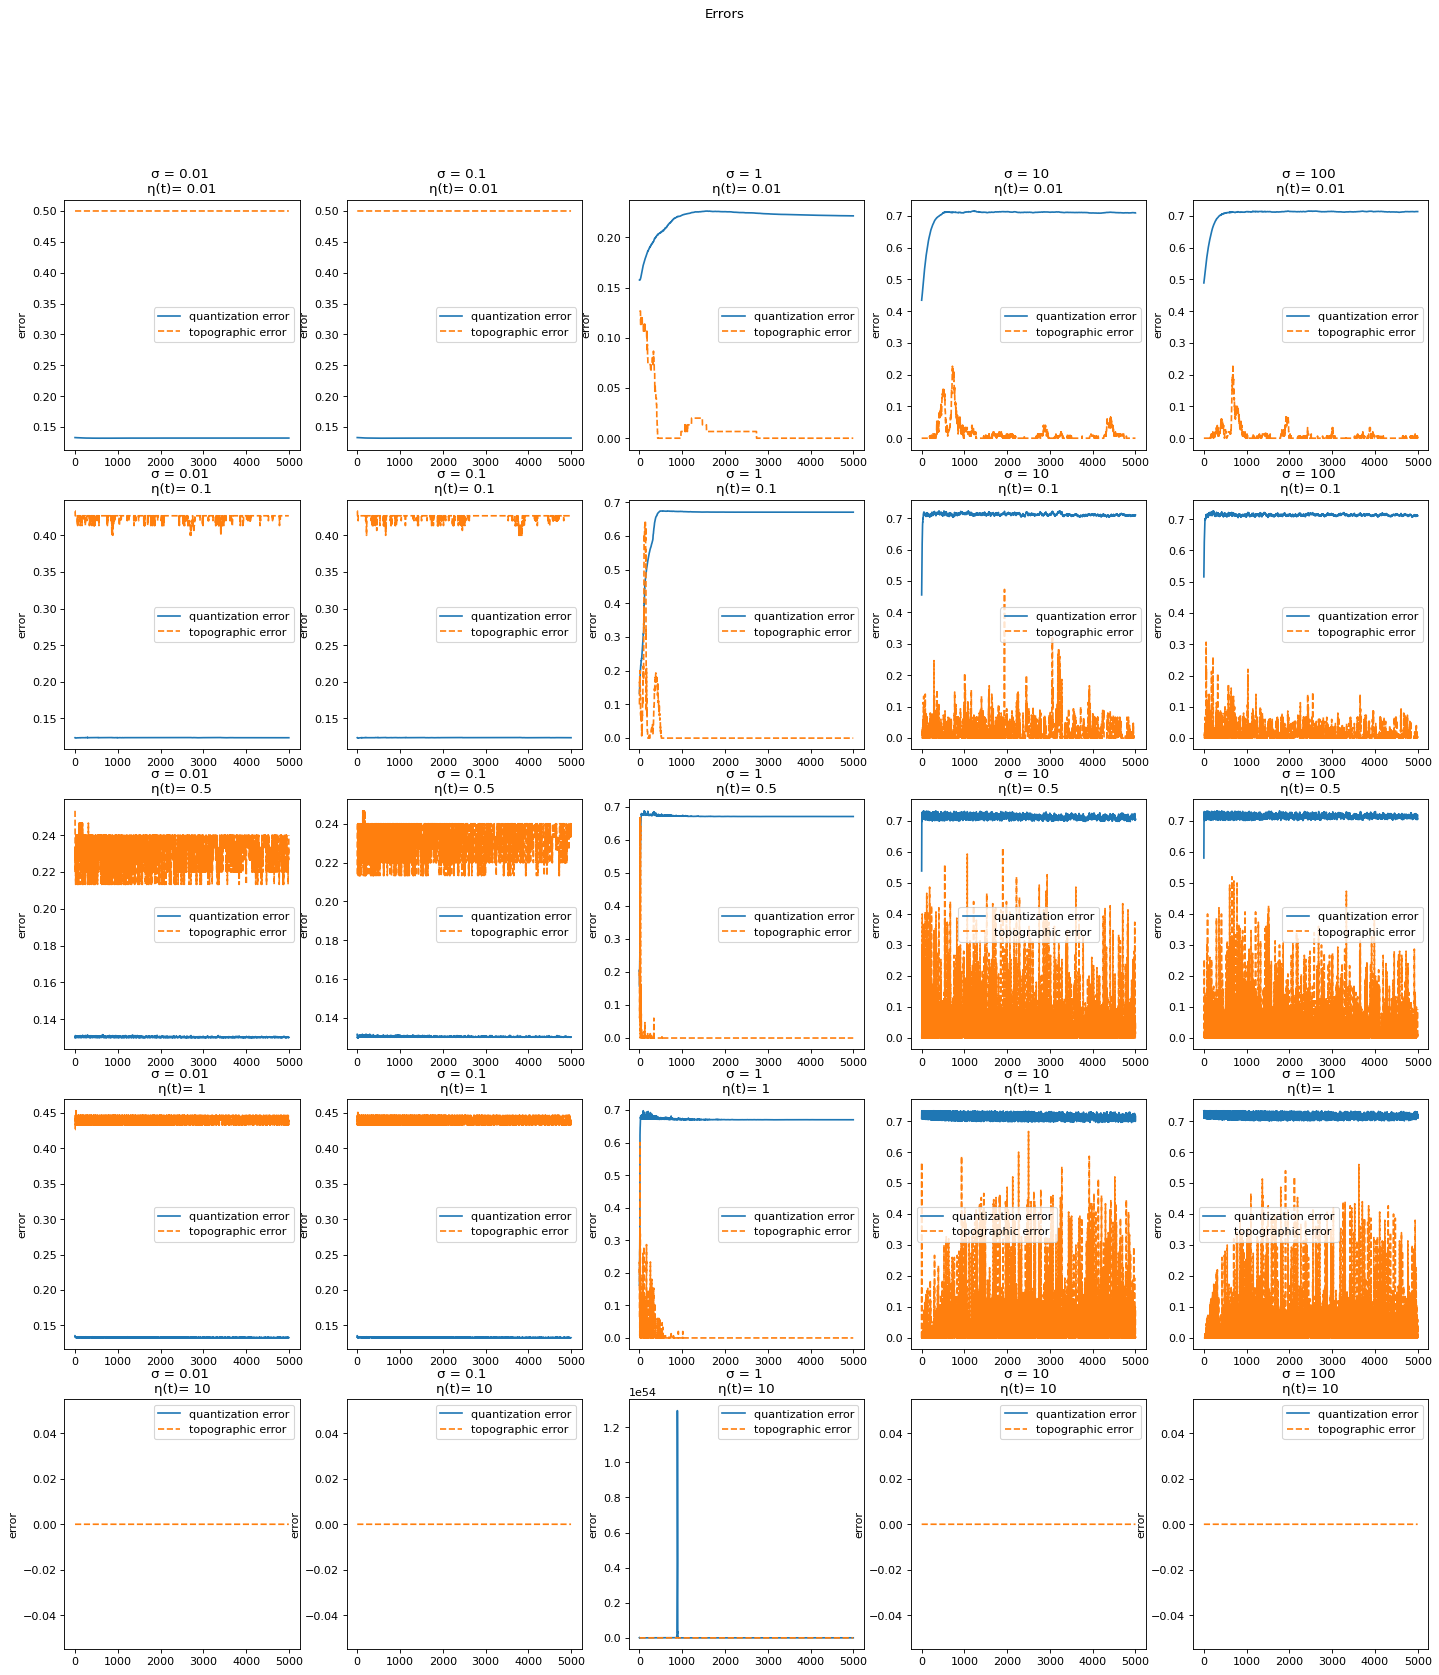

In [384]:
figure(figsize=(fig_x, fig_y+2),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
  som = som_iris33[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error')
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,linestyle='--')
  plt.ylabel('error')
  #plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

## Som 6x6

Paramentets 🎛️

In [347]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 6, 6
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [371]:
som_iris66 = [] 
for i in range(len(sigma)):
  som_iris66.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_iris66[i].random_weights_init(data.values)
  som_iris66[i].train_random(data.values, epochs)

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


Hitmap

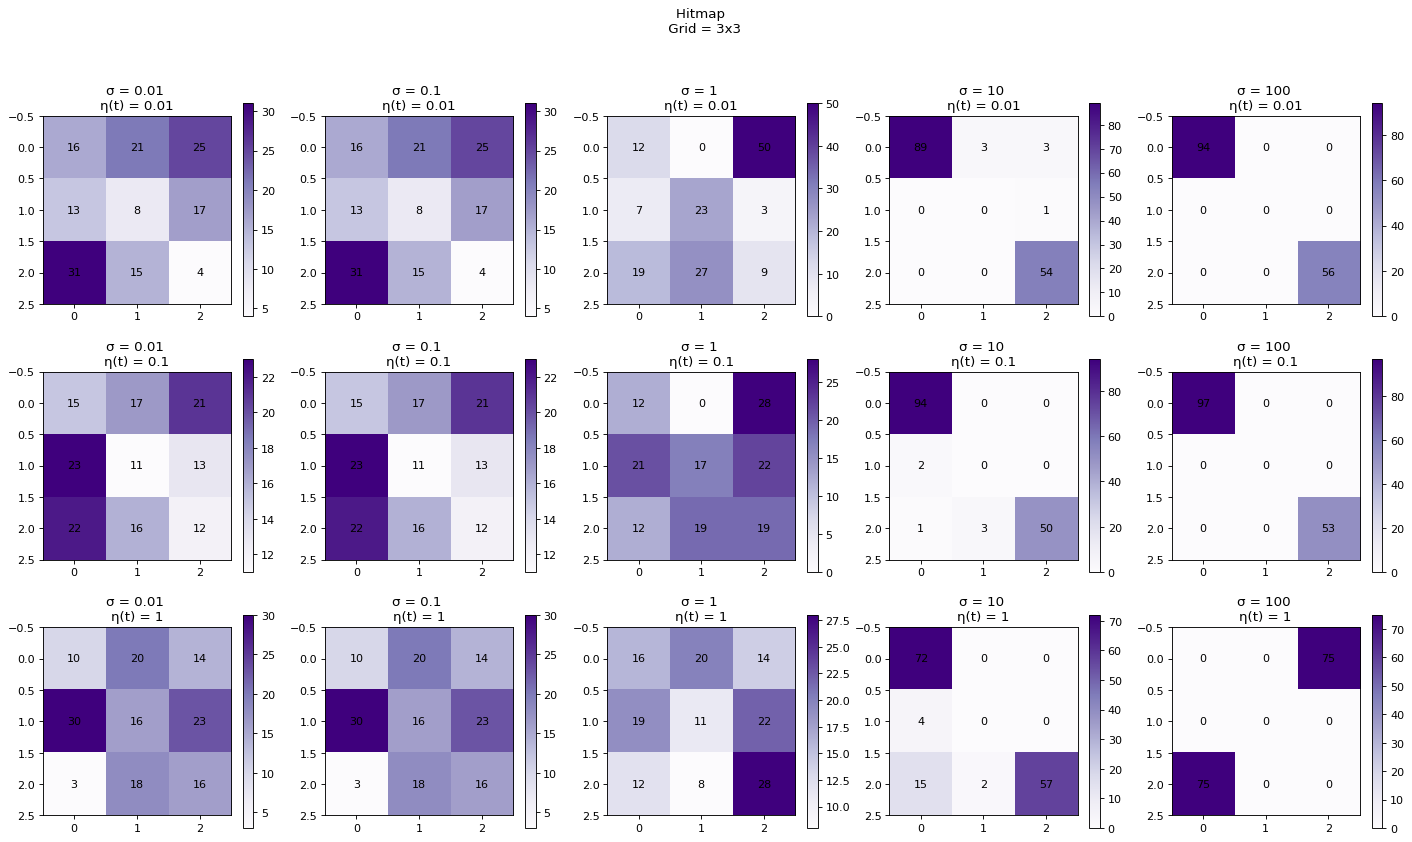

In [372]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris66[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

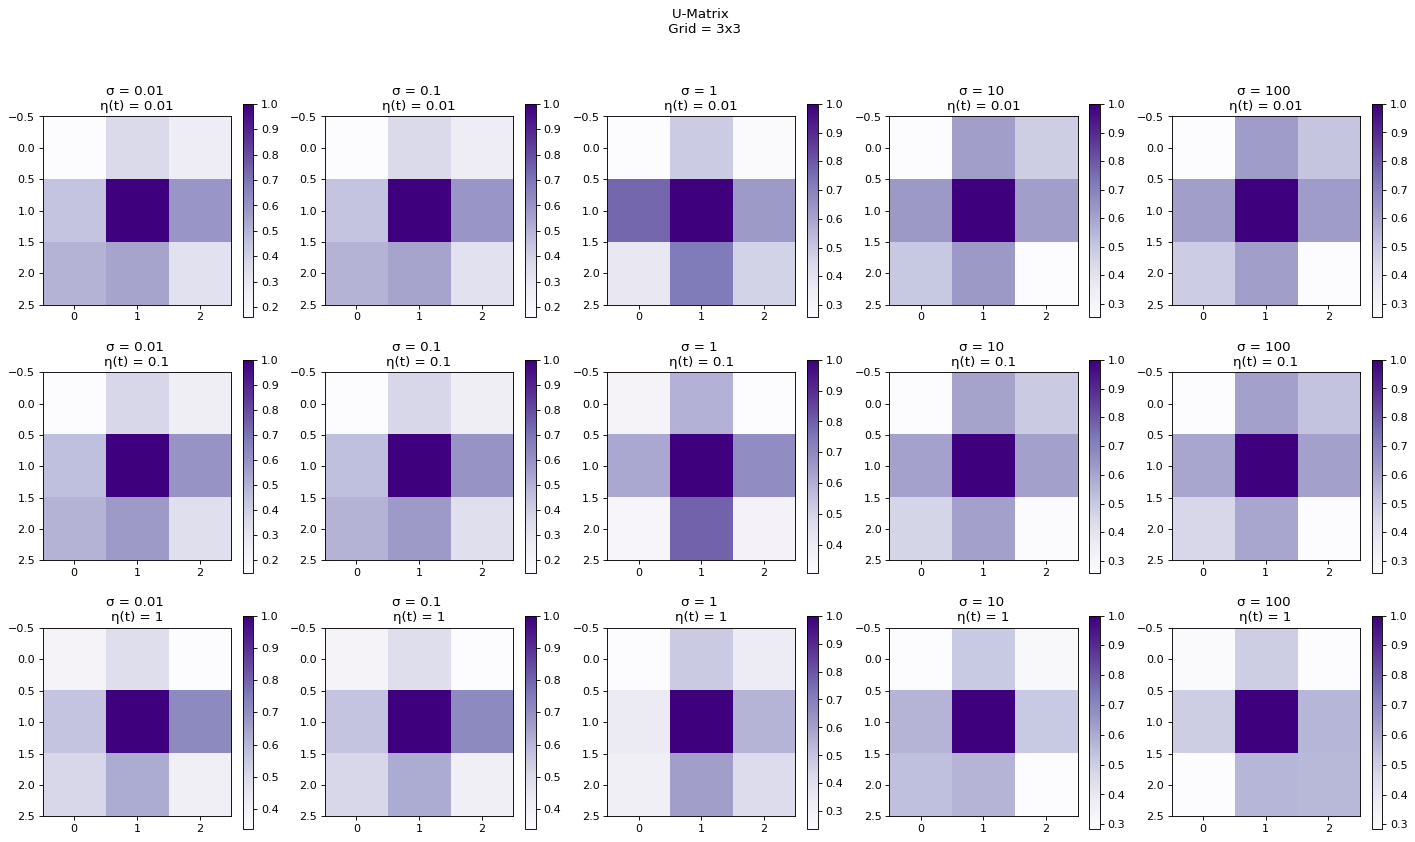

In [373]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris66[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

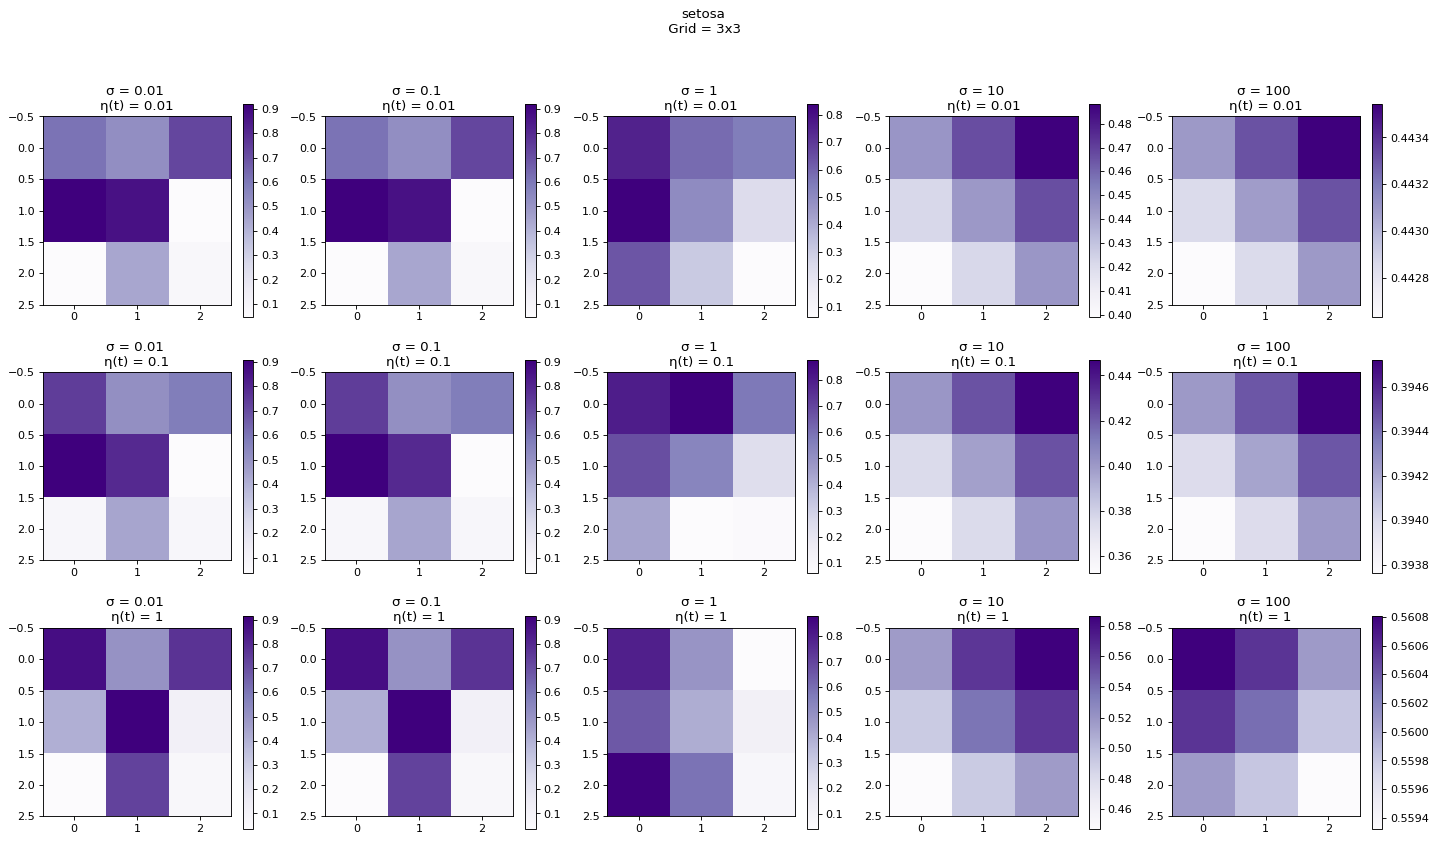

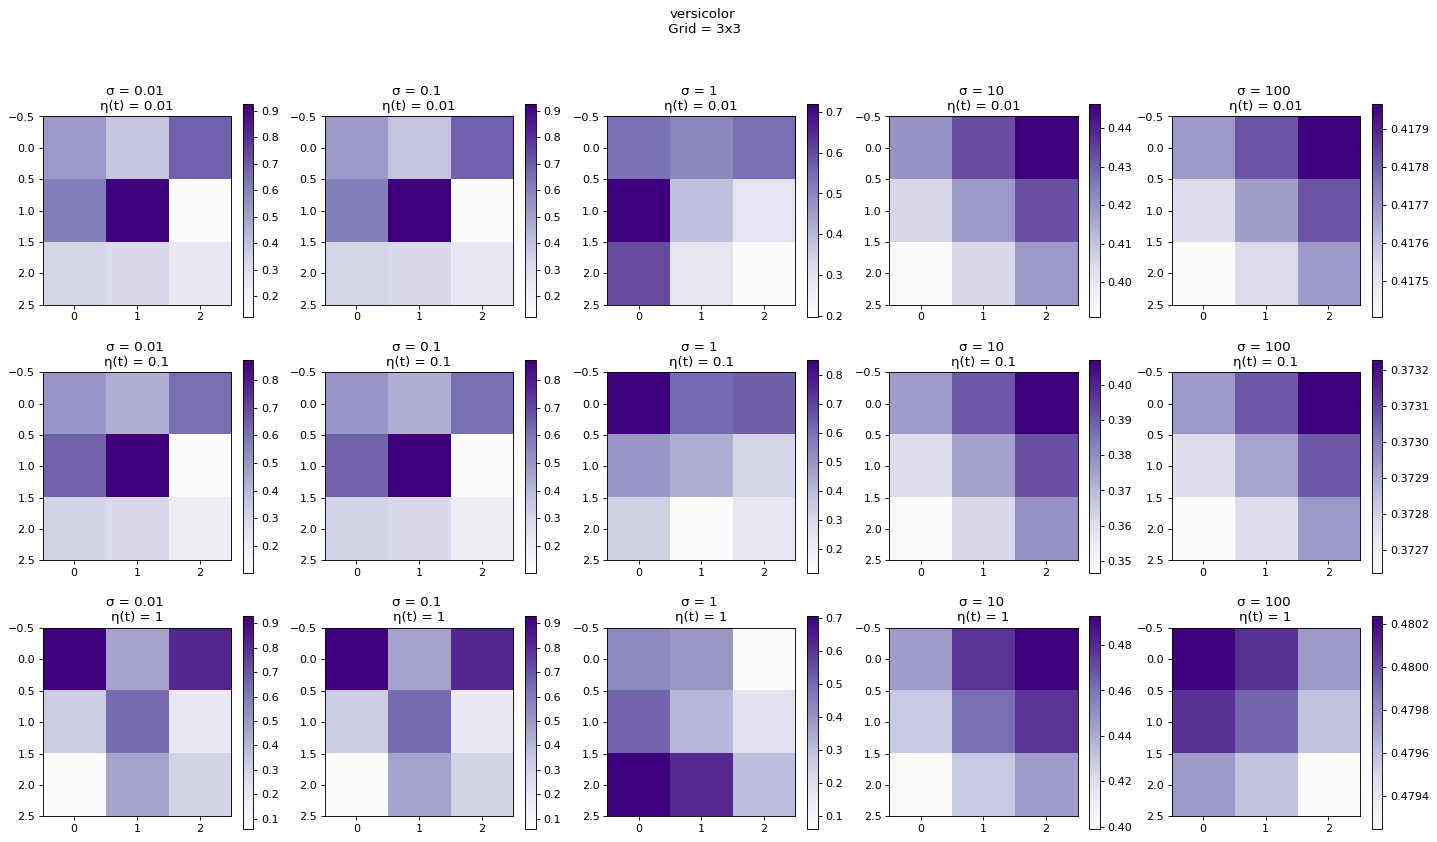

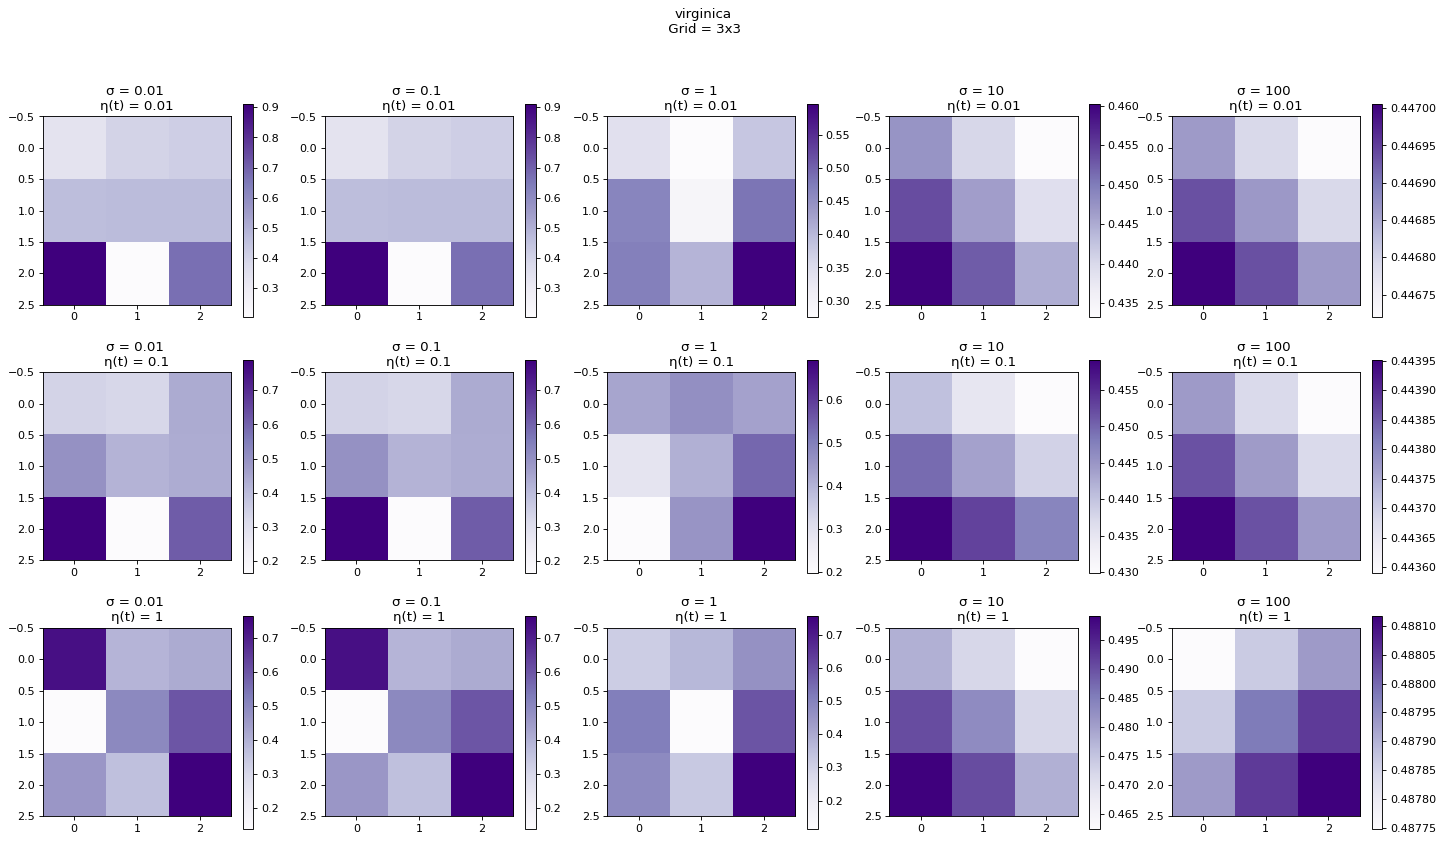

In [374]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_iris66[k]
    weights     = som.get_weights()
    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



<Figure size 960x960 with 0 Axes>

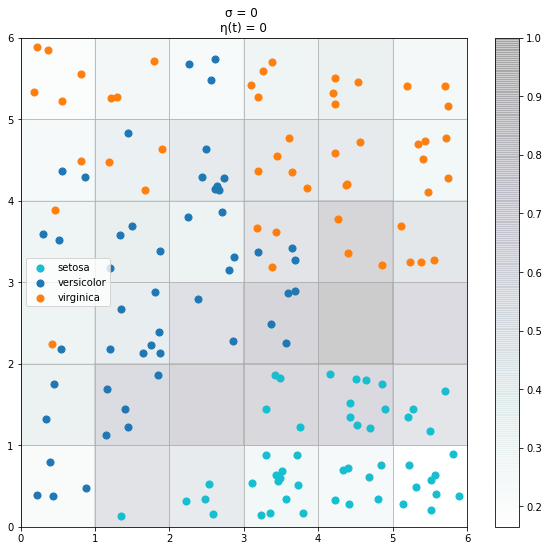

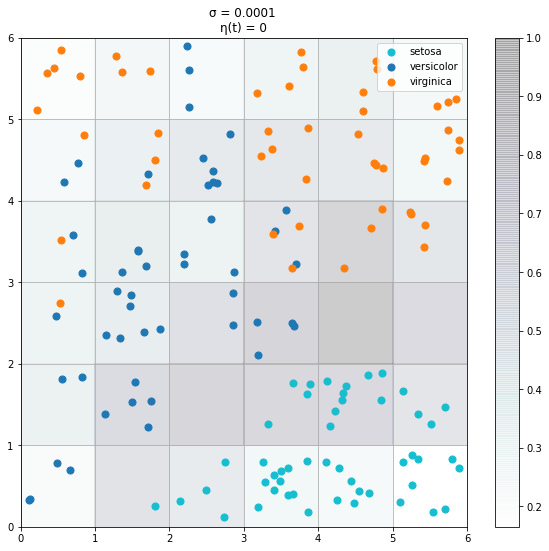

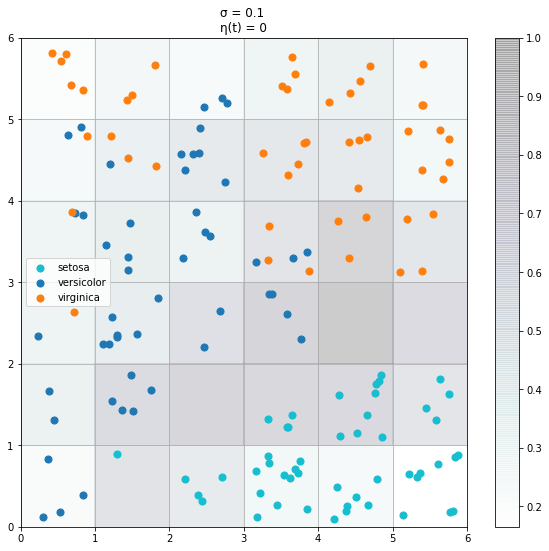

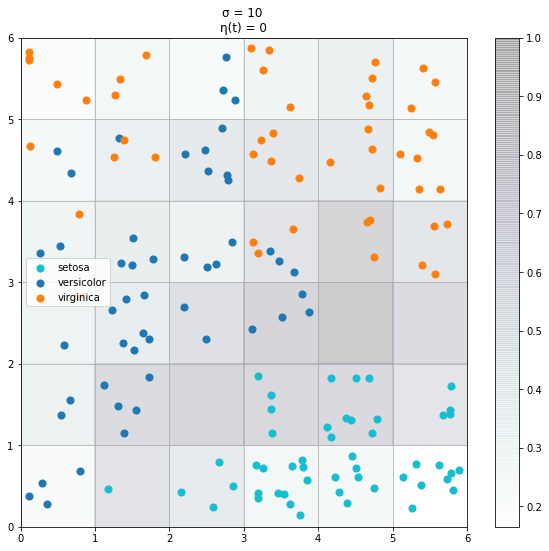

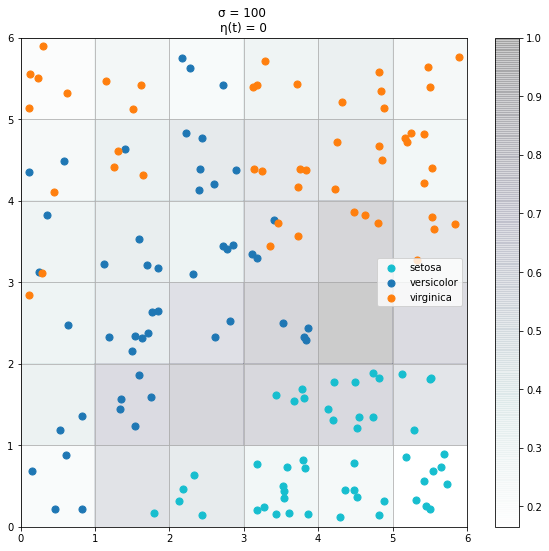

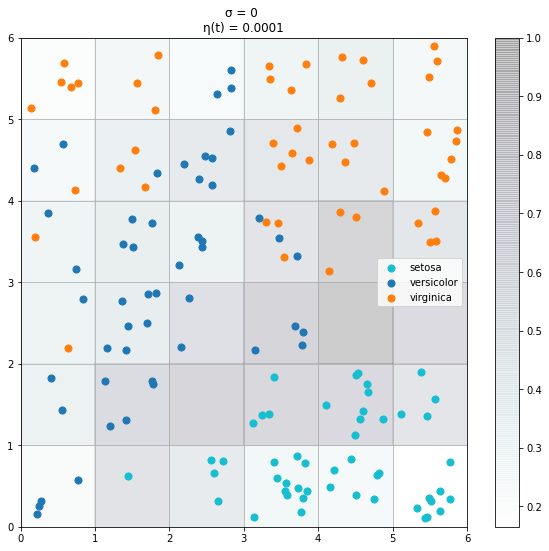

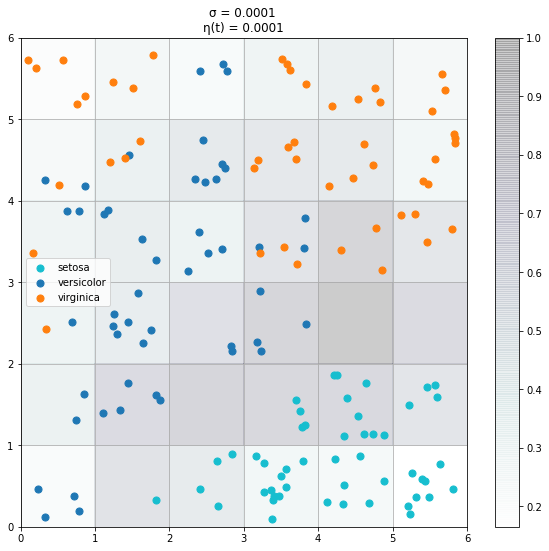

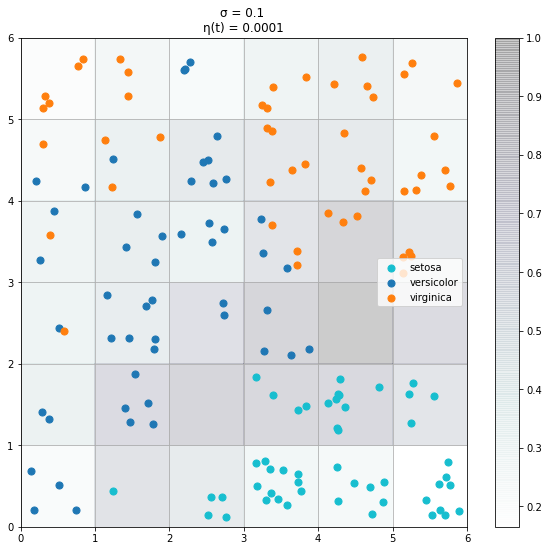

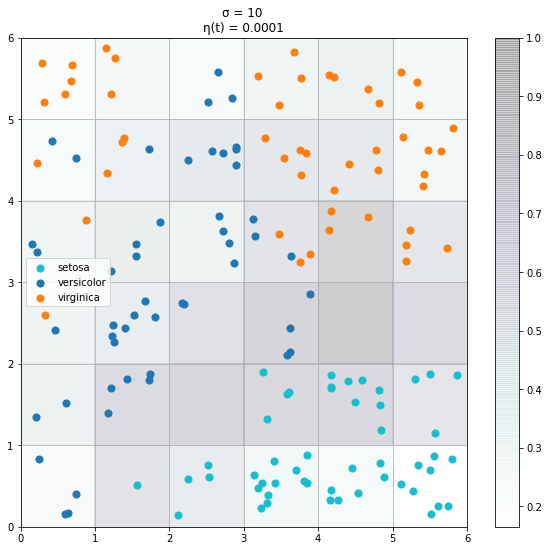

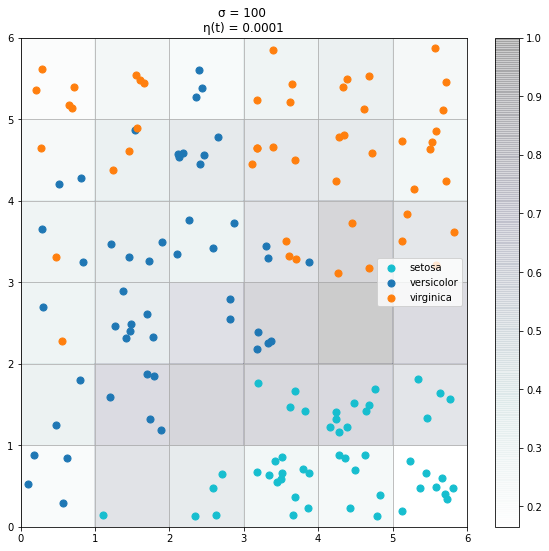

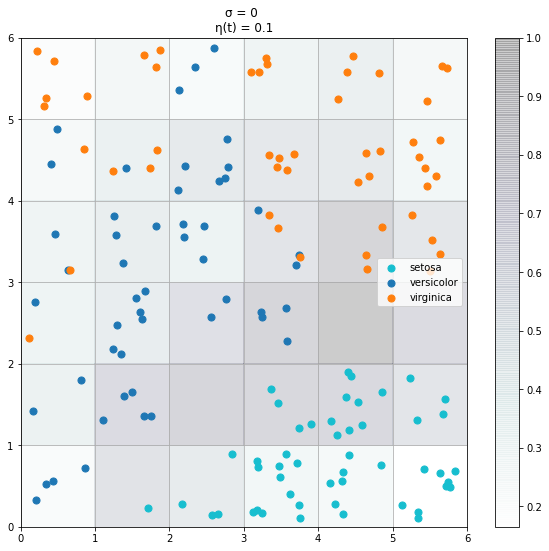

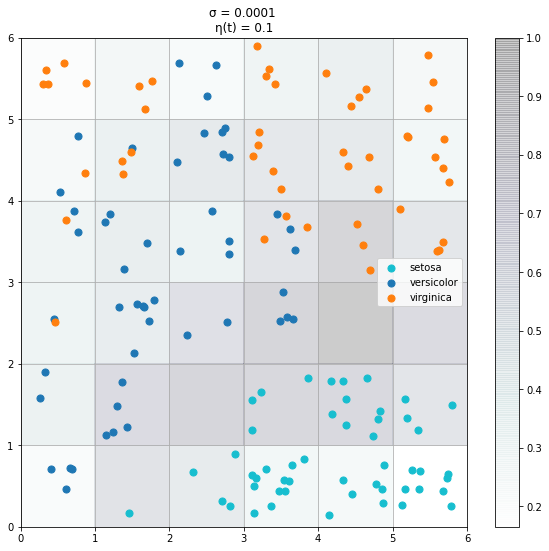

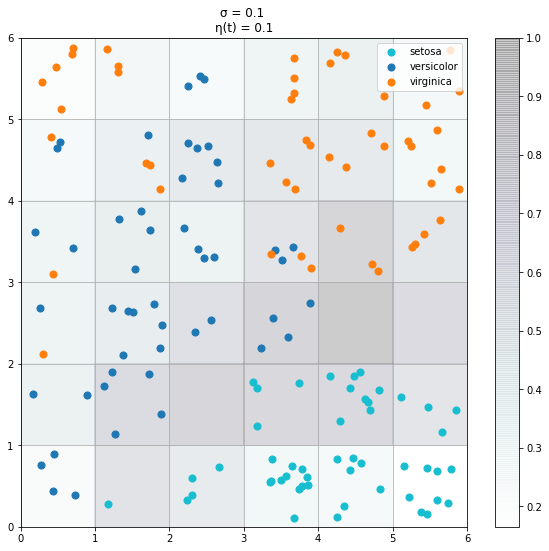

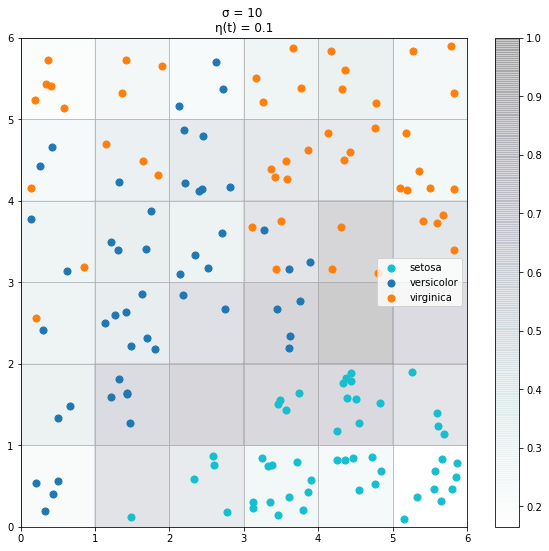

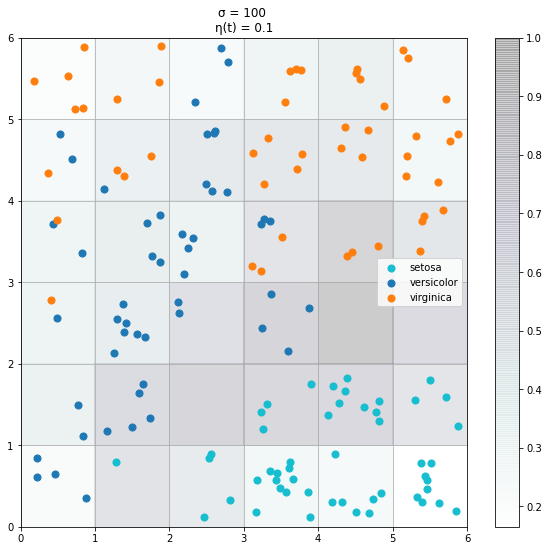

In [360]:

figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris66[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c])
  plt.legend()#loc='upper right')
  plt.grid()
  #plt.savefig('resulting_images/som_seed.png') 
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.show()

### SOM Map

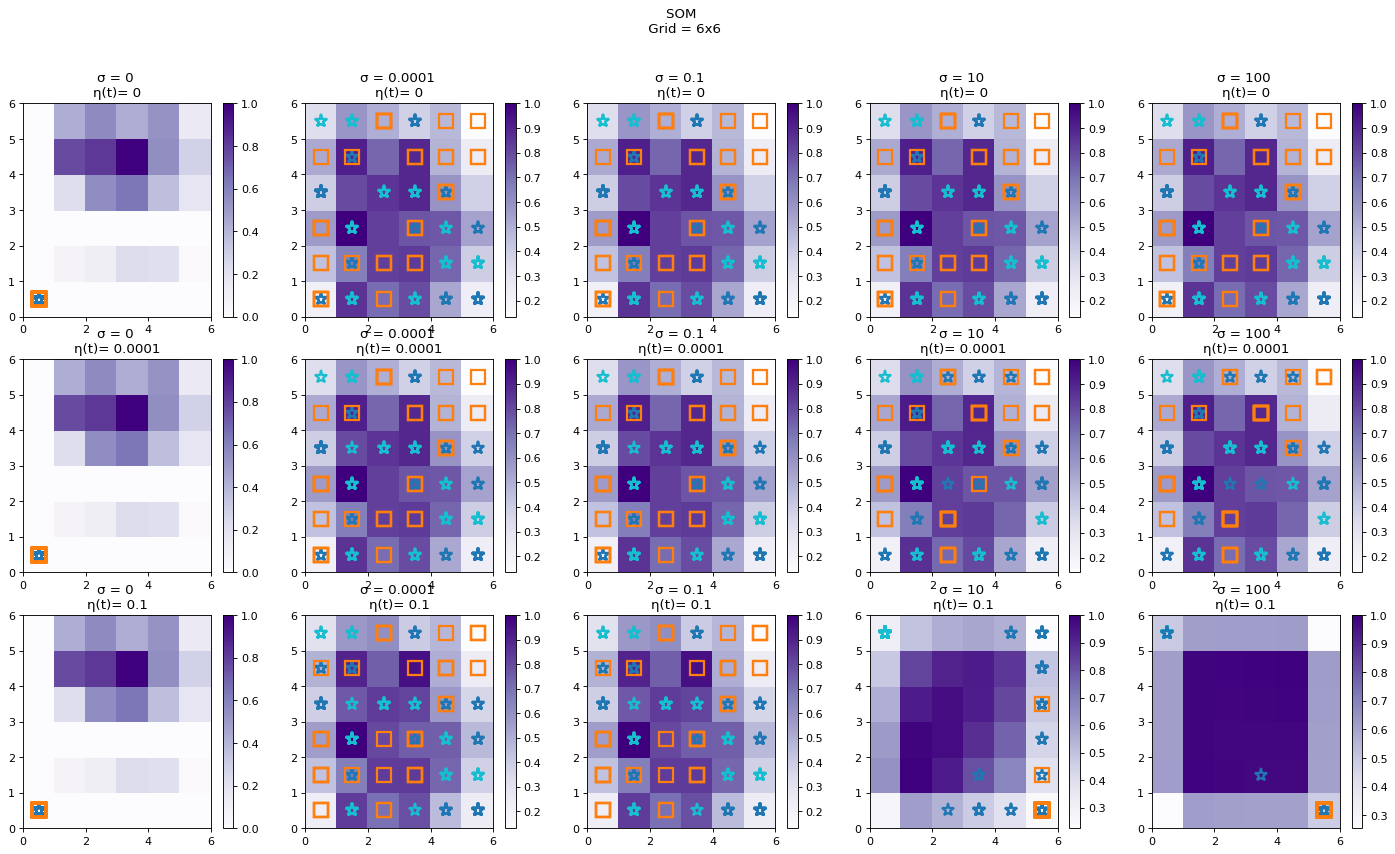

In [354]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_iris66[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
#plt.legend()
plt.show()

### Erros Avaliation

/usr/local/lib/python3.7/dist-packages/minisom.py:258: RuntimeWarning: divide by zero encountered in true_divide
  ax = exp(-power(self._xx-self._xx.T[c], 2)/d)
/usr/local/lib/python3.7/dist-packages/minisom.py:258: RuntimeWarning: invalid value encountered in true_divide
  ax = exp(-power(self._xx-self._xx.T[c], 2)/d)
/usr/local/lib/python3.7/dist-packages/minisom.py:259: RuntimeWarning: divide by zero encountered in true_divide
  ay = exp(-power(self._yy-self._yy.T[c], 2)/d)
/usr/local/lib/python3.7/dist-packages/minisom.py:259: RuntimeWarning: invalid value encountered in true_divide
  ay = exp(-power(self._yy-self._yy.T[c], 2)/d)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib

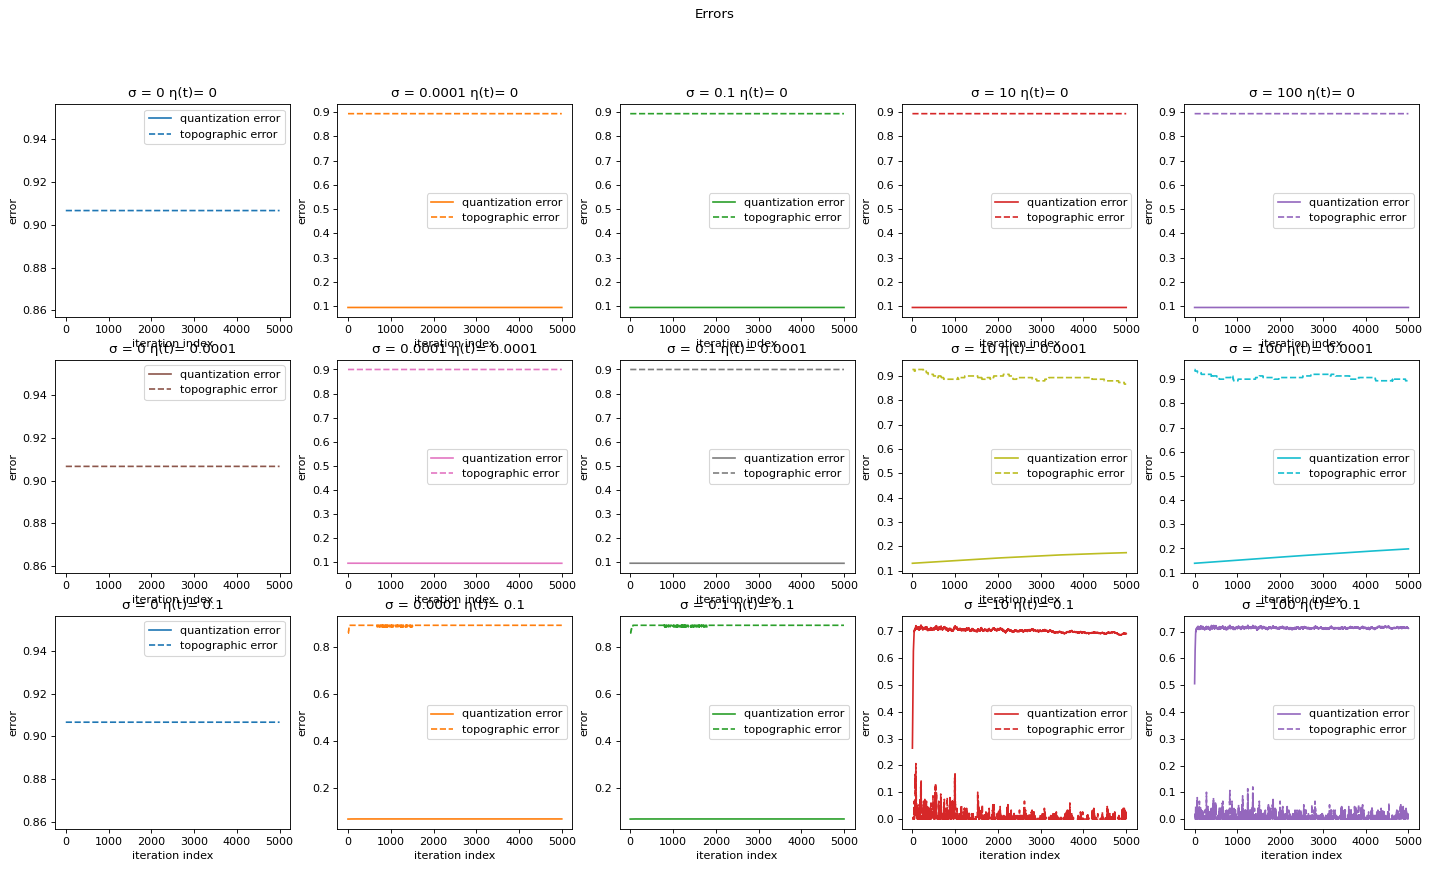

In [355]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_iris66[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

## Som 9x9

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 9, 9
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_iris66 = [] 
for i in range(len(sigma)):
  som_iris66.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_iris66[i].random_weights_init(data.values)
  som_iris66[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris66[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris66[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_iris66[k]
    weights     = som.get_weights()
    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_iris66[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c])
  plt.legend()#loc='upper right')
  plt.grid()
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_iris66[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
#plt.legend()
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_iris66[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

<img src = "https://www.researchgate.net/profile/Pouya-Doerwald/publication/344786970/figure/fig1/AS:970919002521600@1608496537118/Four-groups-of-saliva-samples-available-within-the-Exasens-dataset.png">

# 2 - Exasens Data Set

The Exasens dataset includes demographic information on 4 groups of saliva samples (COPD-Asthma-Infected-HC) collected in the frame of a joint research project, Exasens ([Web Link]), at the Research Center Borstel, BioMaterialBank Nord (Borstel, Germany). The sampling procedure of the patient materials was approved by the local ethics committee of the University of Luebeck under the approval number AZ-16-167 and a written informed consent was obtained from all subjects. A permittivity biosensor, developed at IHP Microelectronics (Frankfurt Oder, Germany), was used for the dielectric characterization of the saliva samples for classification purposes ([Web Link]). 

https://archive.ics.uci.edu/ml/datasets/Exasens#

## Pre-Processing

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00523/Exasens.csv

In [ ]:
df = pd.read_csv('Exasens.csv')
df = df.drop(columns=['ID', 'Imaginary Part', 'Unnamed: 3','Real Part','Unnamed: 5','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'], inplace=False)

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna(axis=0)
sns.pairplot(df, hue='Diagnosis')

In [ ]:
features = df.drop(['Diagnosis'], axis=1)
#Normaling data
scaler = MinMaxScaler() 
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
sns.heatmap(features.astype(float).corr(), linewidths = 0.1, linecolor = 'white', cmap="Reds")

## Parameters

In [ ]:
#Parameters
data = features
labels = df.Diagnosis.unique()

instances = df['Diagnosis'].unique()
instances.shape[0]

#Tranforming the data for numerical values
df['Diagnosis'].replace(['COPD', 'HC', 'Asthma', 'Infected'],
                        [0,1,2,3], inplace=True)
target = df['Diagnosis'].values


In [ ]:
# Models Paramentes 🎛️
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
neighborhood_function = 'gaussian'
random_seed = 10
epochs = 1000

#Plor Paramenters 
color_map = 'Reds'
markers = ['*', 's', 'D','o',".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*"]
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

## Som 3x3

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 3, 3
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_Exasens33 = [] 
for i in range(len(sigma)):
  som_Exasens33.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_Exasens33[i].random_weights_init(data.values)
  som_Exasens33[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens33[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens33[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t)= '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_Exasens33[k]
    weights     = som.get_weights()
    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens33[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c])
  plt.legend()#loc='upper right')
  plt.grid()
  #plt.savefig('resulting_images/som_seed.png')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_Exasens33[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
#plt.legend()
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_Exasens33[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

## Som 6x6

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 6, 6
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_Exasens66 = [] 
for i in range(len(sigma)):
  som_Exasens66.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_Exasens66[i].random_weights_init(data.values)
  som_Exasens66[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_Exasens66[k]
    weights     = som.get_weights()
    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  #plt.subplot(3,3,(k+1))
  som = som_Exasens66[k] 
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c])
  plt.legend()#loc='upper right')
  plt.grid()
  #plt.savefig('resulting_images/som_seed.png')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_Exasens66[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
#plt.legend()
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_Exasens66[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

## Som 9x9

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 9, 9
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_Exasens66 = [] 
for i in range(len(sigma)):
  som_Exasens66.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_Exasens66[i].random_weights_init(data.values)
  som_Exasens66[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]
  plt.subplot(3,3,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_Exasens66[k]
    weights = som.get_weights()
    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
k=0
figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]

  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c])
  plt.legend()#loc='upper right')
  plt.grid()
  #plt.savefig('resulting_images/som_seed.png')
  #plt.title("Distance Map "+str(n_neurons[k])+'x'+str(m_neurons[k])+" sigma "+str(sigma[k]))
  plt.title('σ = '+str(sigma[k])+' \nη(t)  Rate = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(3,3,(k+1))
  som = som_Exasens66[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
#plt.legend()
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(3,3,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_Exasens66[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

## Som 12x12

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 12, 12
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_Exasens66 = [] 
for i in range(len(sigma)):
  som_Exasens66.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_Exasens66[i].random_weights_init(data.values)
  som_Exasens66[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]

  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_Exasens66[k]
    weights     = som.get_weights()
    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
k=0
figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_Exasens66[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c-1])
  plt.legend()#loc='upper right')
  plt.grid()
  plt.title('σ = '+str(sigma[k])+' \nη(t)  Rate = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_Exasens66[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(features.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_Exasens66[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()


<img src="https://storage.googleapis.com/kaggle-datasets-images/33334/43825/05f9c10363dedcb3507c0c94a258e51c/dataset-cover.jpg?t=2018-06-26-04-03-17">
font https://www.kaggle.com/datasets/rwzhang/seeds-dataset

# 3 - Seads Dataset

https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. 

http://archive.ics.uci.edu/ml/datasets/seeds

Exemple can be founf [here](https://www.kaggle.com/code/jonathankristanto/customer-clustering-with-self-organizing-map-som)

## Pre-processing

In [ ]:
columns=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', 
                    names=columns, 
                   sep='\t+', engine='python')

In [ ]:

sns.pairplot(df, hue = 'target')


In [ ]:
target = df['target'].values
labels = ['Kama','Rosa', 'Canadian']

data = df[df.columns[:-1]]

scaler = MinMaxScaler() 
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
#s

# data normalization
#data = (data - np.mean(data, axis=0)) / np.std(data, axis=0) #normalization without using Sklearn
#data = data.values

## Parameters

In [ ]:
# Models Paramentes 🎛️
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
neighborhood_function = 'gaussian'
random_seed = 10
epochs = 1000

#Plor Paramenters 
color_map = 'gist_earth'
markers = ['*', 's', 'D','o',".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*"]
colors = ['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9']

## Som 3x3

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 3, 3
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_seeds33 = [] 
for i in range(len(sigma)):
  som_seeds33.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_seeds33[i].random_weights_init(data.values)
  som_seeds33[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds33[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  grid_shape  = som.get_weights().shape[0:2]
  weights     = som.get_weights()

  plt.subplot(3,3,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds33[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_seeds33[k]
    frequencies = som.activation_response(data.values).astype(int)
    frequencies = frequencies.T[::-1]
    grid_shape  = som.get_weights().shape[0:2]
    weights     = som.get_weights()
    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
k=0
figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  #plt.subplot(3,3,(k+1))
  som = som_seeds33[k]
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = labels
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=labels[c-1])
  plt.legend()#loc='upper right')
  plt.grid()
  #plt.savefig('resulting_images/som_seed.png')
  #plt.title("Distance Map "+str(n_neurons[k])+'x'+str(m_neurons[k])+" sigma "+str(sigma[k]))
  plt.title('σ = '+str(sigma[k])+' \nη(t)  Rate = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_seeds33[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_seeds33[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error')#,color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' )
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

## Som 6x6

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 6, 6
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_seeds66 = [] 
for i in range(len(sigma)):
  som_seeds66.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_seeds66[i].random_weights_init(data.values)
  som_seeds66[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds66[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds66[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_seeds66[k]
    frequencies = som.activation_response(data.values).astype(int)
    frequencies = frequencies.T[::-1]
    grid_shape  = som.get_weights().shape[0:2]
    weights     = som.get_weights()

    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
k=0
figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds66[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c-1])
  plt.legend()#loc='upper right')
  plt.grid()
  plt.title('σ = '+str(sigma[k])+' \nη(t)  Rate = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_seeds66[k]


  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))


#plt.legend()
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_seeds66[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

## Som 9x9

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 9, 9
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_seeds99 = [] 
for i in range(len(sigma)):
  som_seeds99.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_seeds99[i].random_weights_init(data.values)
  som_seeds99[i].train_random(data.values, epochs)

Hitmap

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds99[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds99[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_seeds99[k]
    frequencies = som.activation_response(data.values).astype(int)
    frequencies = frequencies.T[::-1]
    grid_shape  = som.get_weights().shape[0:2]
    weights     = som.get_weights()

    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds99[k]
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c-1])
  plt.legend()#loc='upper right')
  plt.grid()
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.show()

### SOM Map

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_seeds99[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### Erros Avaliation

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_seeds99[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))
  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
plt.show()

## Som 12x12

Paramentets 🎛️

In [ ]:
# # Models Paramentes 🎛️
n_neurons, m_neurons = 12, 12
# sigma          = [.2,.4,.6,.2,.4,.6,.2,.4,.6]
# learning_rate  = [.2,.2,.2,.4,.4,.4,.6,.6,.6]
# neighborhood_function = 'gaussian'
# random_seed = 10
# epochs = 1000

In [ ]:
som_seeds12 = [] 
for i in range(len(sigma)):
  som_seeds12.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_seeds12[i].random_weights_init(data.values)
  som_seeds12[i].train_random(data.values, epochs)

Hitmap

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Hitmap \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds12[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  plt.subplot(n_rows,n_columns,k+1)
  plt.imshow(frequencies,cmap=color_map)
  plt.colorbar()
  for (i, j), value in np.ndenumerate(frequencies):
          plt.text(j, i, value, verticalalignment='center', 
                                horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### U-Matrix

In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds12[k]
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
plt.show()

### Features Maps

In [ ]:
for l in range(len(labels)):
  figure (figsize=(fig_x,fig_y),dpi=80)
  plt.suptitle(labels[l]+'\n Grid = '+str(n_neurons)+'x'+str(m_neurons))
  for k in range(len(sigma)):
    som = som_seeds12[k]
    weights     = som.get_weights()

    plt.subplot(n_rows,n_columns,k+1)
    plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
    plt.imshow(weights[:, :, l-1], cmap=color_map)
    plt.colorbar() #for plot the bar
  plt.show()

### Distance Map

> Its possible to plot this in a grid way? Just like a have made in other plots



<Figure size 960x960 with 0 Axes>

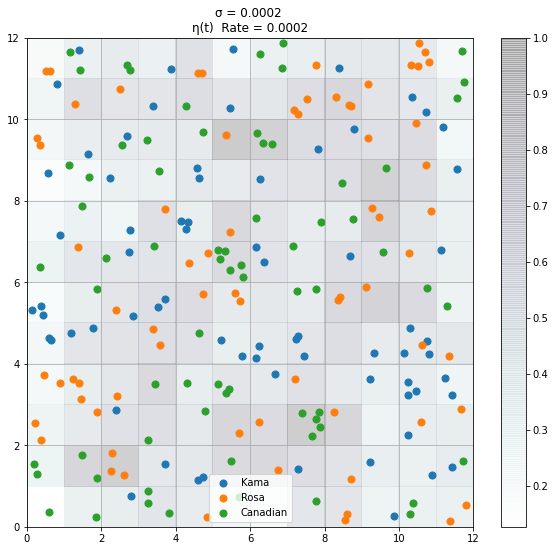

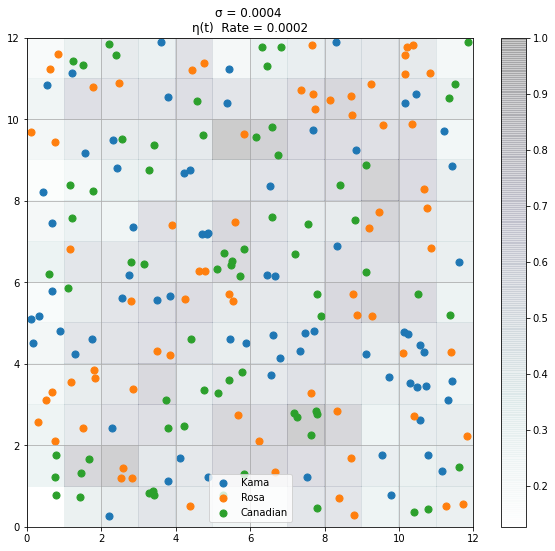

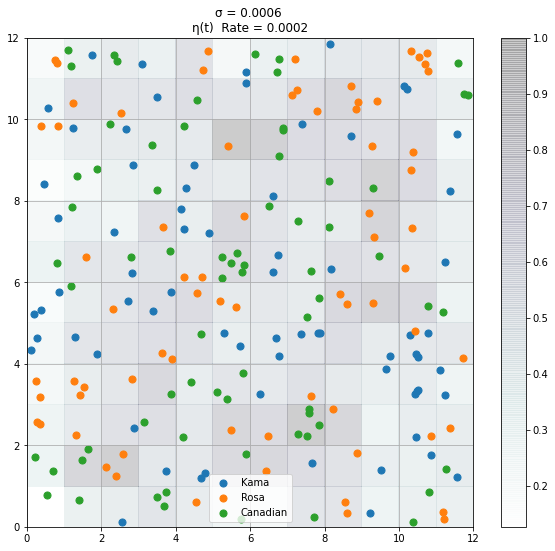

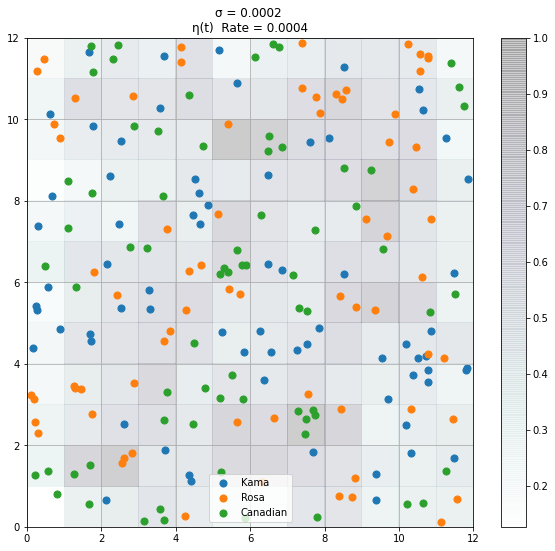

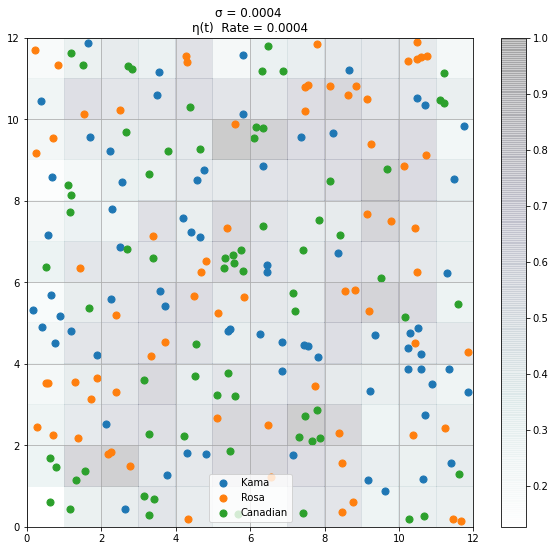

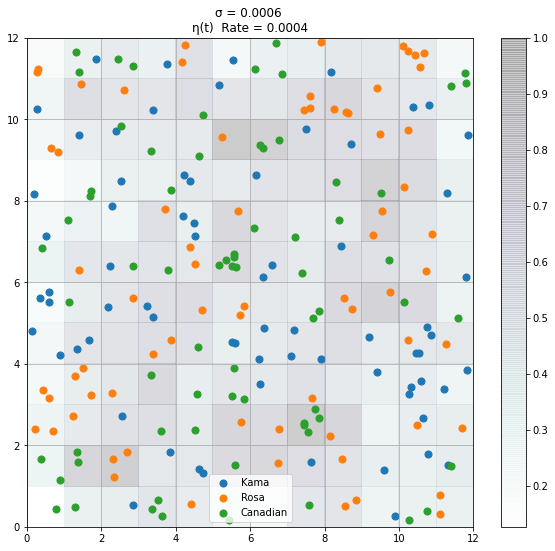

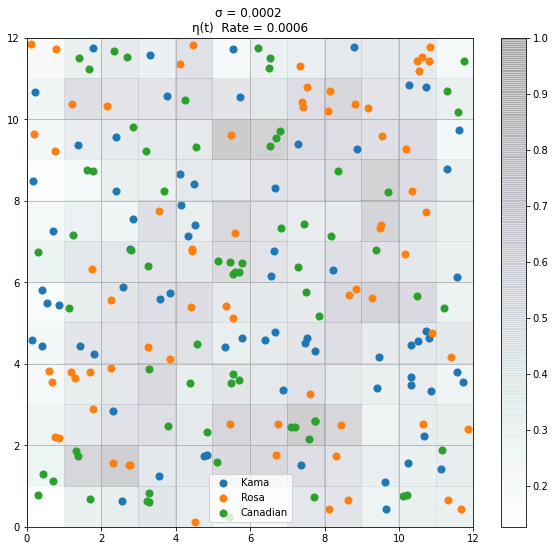

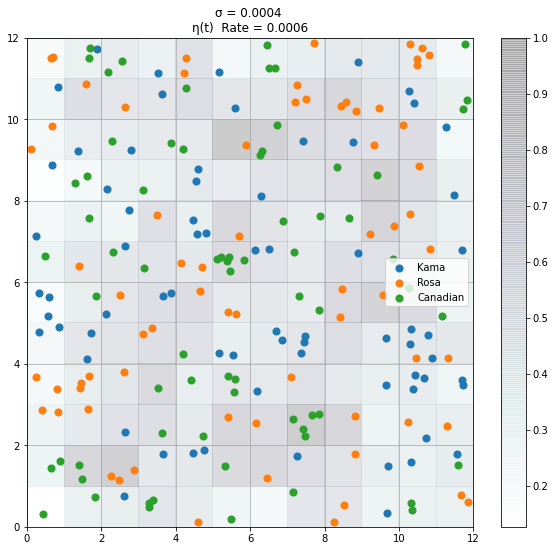

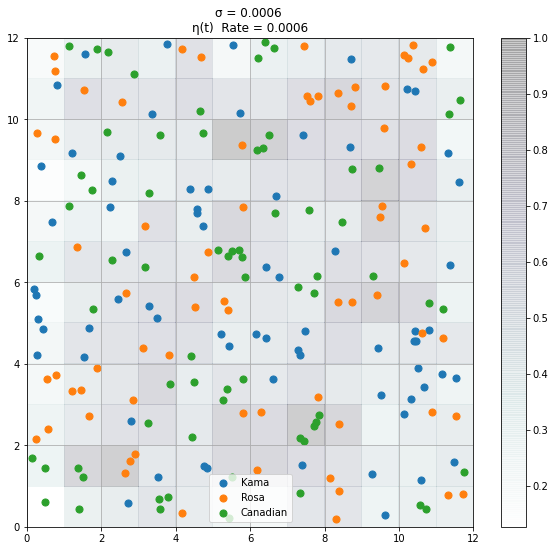

In [ ]:
k=0
figure(figsize=(12, 12),dpi=80)
plt.suptitle('Distance Map \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  som = som_seeds12[k]
  
  w_x, w_y = zip(*[som.winner(d) for d in data.values])
  w_x, w_y = np.array(w_x), np.array(w_y)
  label_names = np.array(labels)
  plt.figure(figsize=(10, 9))
  plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
  plt.colorbar()
  for c in np.unique(target):
      idx_target = target==c
      plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                  w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                  s=50, c=colors[c-1], 
                  label=label_names[c-1])
  plt.legend()#loc='upper right')
  plt.grid()
  plt.title('σ = '+str(sigma[k])+' \nη(t)  Rate = '+str(learning_rate[k]))
  plt.show()

### SOM Map

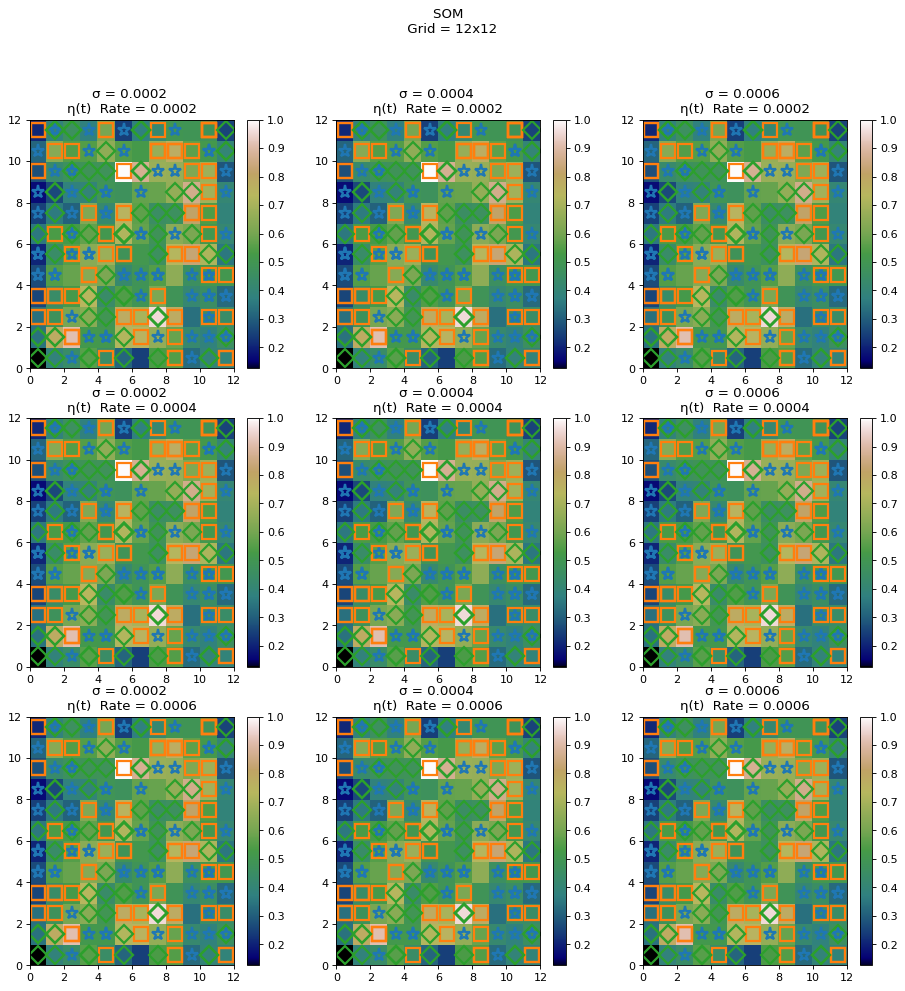

In [ ]:
k=0
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('SOM \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,(k+1))
  som = som_seeds12[k]
  plt.pcolor(som.distance_map().T, cmap=color_map)  # plotting the distance map as background
  plt.colorbar()
  for cnt, xx in enumerate(data.values):
      w = som.winner(xx)  # getting the winner
      # palce a marker on the winning position for the sample xx
      plt.plot(w[0]+.5, w[1]+.5,markers[target[cnt]-1],markerfacecolor='None',markeredgecolor=colors[target[cnt]-1],markersize=12, markeredgewidth=2)
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
plt.show()

### Erros Avaliation

/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)
/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + inp

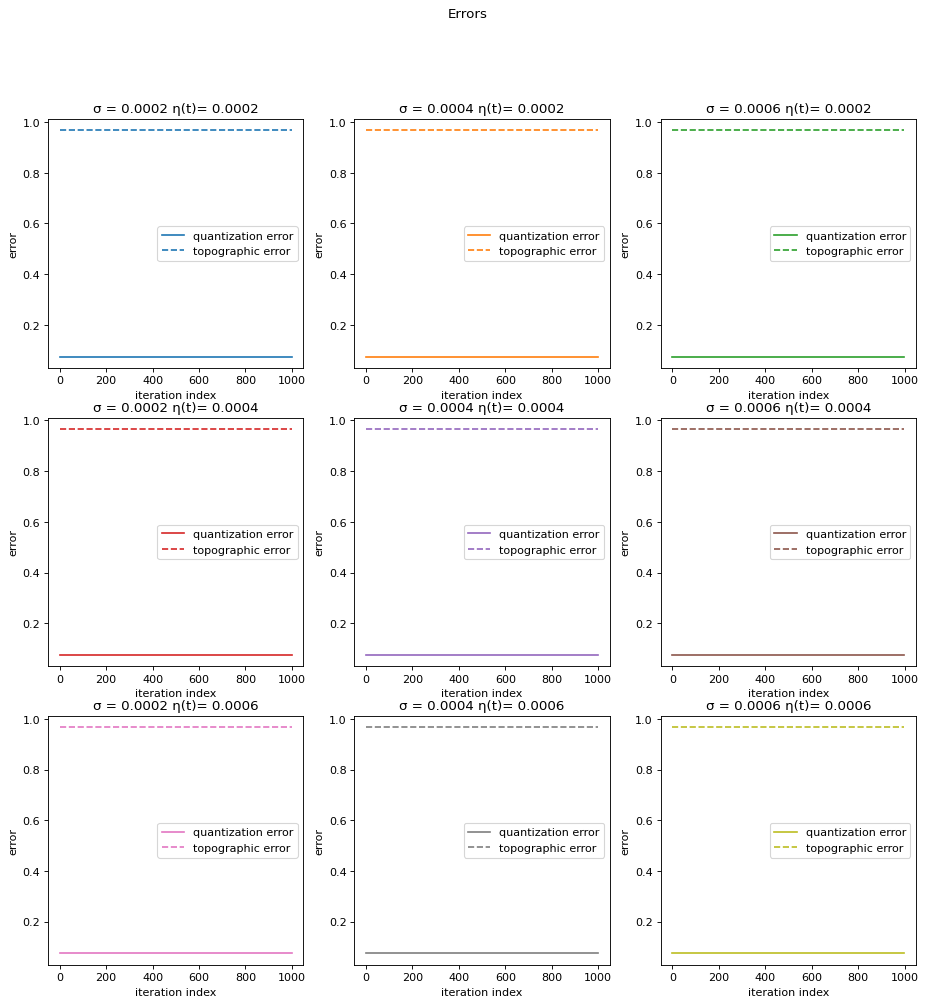

In [ ]:
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('Errors')
for k in range(len(sigma)):
  plt.subplot(n_rows,n_columns,k+1)
  plt.title('σ = '+str(sigma[k])+' η(t)= '+str(learning_rate[k]))
  som = som_seeds12[k]
  max_iter = epochs
  q_error = []
  t_error = []
  for i in range(max_iter):
      rand_i = np.random.randint(len(data.values[0]))
      som.update(data.values[rand_i], som.winner(data.values[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data.values))
      t_error.append(som.topographic_error(data.values))

  plt.plot(np.arange(max_iter), q_error, label='quantization error',color=colors[k])
  plt.plot(np.arange(max_iter), t_error, label='topographic error' ,color=colors[k],linestyle='--')
  plt.ylabel('error')
  plt.xlabel('iteration index')
  plt.legend()
  #plt.legend()
plt.show()

# 4 - Time Series Clusterization

For this example I follow [this](https://github.com/JustGlowing/minisom/blob/master/examples/TimeSeries.ipynb) available on `minisom` github documentation

## Pre-processing 

In [ ]:

# data from
# https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv

sales_transaction = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data = sales_transaction[[f'Normalized {i}' for i in range(52)]]

--2022-07-28 12:00:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317399 (310K) [application/x-httpd-php]
Saving to: ‘Sales_Transactions_Dataset_Weekly.csv’

Sales_Transactions_ 100%[===================>] 309.96K  1.04MB/s    in 0.3s    

2022-07-28 12:00:16 (1.04 MB/s) - ‘Sales_Transactions_Dataset_Weekly.csv’ saved [317399/317399]



In [ ]:
len(sales_transaction)

811

In [ ]:
som_sales33 = [] 
for i in range(len(sigma)):
  som_sales33.append(MiniSom(n_neurons, m_neurons, data.shape[1], 
                          sigma=sigma[i], 
                          learning_rate=learning_rate[i],
                          neighborhood_function=neighborhood_function, 
                          random_seed=random_seed))
  som_sales33[i].random_weights_init(data.values)
  som_sales33[i].train_random(data.values, epochs)
  som_sales33[i].train_batch(data.values, 50000, verbose=True)  # random training

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.4365851093315267


/usr/local/lib/python3.7/dist-packages/minisom.py:513: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.4365851093315267
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.4365851093315267
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.3896116046130713
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.3896116046130713
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.3896116046130713
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.357479490971796
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.357479490971796
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 1.357479490971796


In [ ]:

# som = MiniSom(8, 8, data.shape[1], sigma=2., learning_rate=0.5, 
#               neighborhood_function='gaussian', random_seed=10)
# som.pca_weights_init(data)
# print("Training...")
# som.train_batch(data, 50000, verbose=True)  # random training
# print("\n...ready!")


In [ ]:
som = som_sales33[i]

win_map = som.win_map(data)
plt.figure(figsize=(16, 16))
the_grid = GridSpec(8, 8)
for position in win_map.keys():
    plt.subplot(the_grid[6-position[1], position[0]])
    plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    plt.plot(np.mean(win_map[position], axis=0))
    plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)
#plt.savefig('resulting_images/time_series.png')
plt.show()



KeyError: ignored

In [ ]:
# frequencies = som.activation_response(data.values).astype(int)
# frequencies = frequencies.T[::-1]
# grid_shape  = som.get_weights().shape[0:2]
# weights     = som.get_weights()

#plt.subplot(3,3,k+1)
# plt.imshow(frequencies,cmap=color_map)
# plt.colorbar()
# for (i, j), value in np.ndenumerate(frequencies):
#         plt.text(j, i, value, verticalalignment='center', 
#                               horizontalalignment='center')
plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
# plt.subplot(3,2,2)
plt.imshow(som.distance_map(),cmap=color_map )
plt.colorbar()
plt.show()


In [ ]:
#i = 0 
figure (figsize=(fig_x,fig_y),dpi=80)
plt.suptitle('U-Matrix \n Grid = '+str(n_neurons)+'x'+str(m_neurons))
for k in range(len(sigma)):
  #som = som_seeds66[k]
  frequencies = som.activation_response(data.values).astype(int)
  frequencies = frequencies.T[::-1]
  grid_shape  = som.get_weights().shape[0:2]
  weights     = som.get_weights()

  plt.subplot(3,3,k+1)
  # plt.imshow(frequencies,cmap=color_map)
  # plt.colorbar()
  # for (i, j), value in np.ndenumerate(frequencies):
  #         plt.text(j, i, value, verticalalignment='center', 
  #                               horizontalalignment='center')
  plt.title('σ = '+str(sigma[k])+' \nη(t) = '+str(learning_rate[k]))
  # plt.subplot(3,2,2)
  plt.imshow(som.distance_map(),cmap=color_map )
  plt.colorbar()
  # plt.title('U-Matrix')

  # for i in range(len(labels)):
  #   plt.subplot(3,2, i + 3)
  #   plt.title(labels[i])
  #   plt.imshow(weights[:, :, i-1], cmap=color_map)
  #   plt.suptitle('Maps \n Grid = '+str(n_neurons)+'x'+str(m_neurons)+" \nsigma = "+str(sigma[k])+' \nLearngim Rate = '+str(learning_rate[k]))
  #   plt.colorbar() #for plot the bar
plt.show()

# References

[HAYKIN, Simon. Redes Neurais: Princípios e prática. Porto Alegre
RS:Bookman, 2001.](https://www.amazon.com.br/Redes-Neurais-Princ%C3%ADpios-Simon-Haykin-ebook/dp/B073QSG69Y)


https://www.kaggle.com/code/phelpsmemo/cap-351-neurocomputacao-projeto2-som


In [ ]:
n_neurons = 3
m_neurons = 4

import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(3, 3))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names, bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.grid()
#plt.savefig('resulting_images/som_seed_pies.png')
plt.show()

In [ ]:
n_neurons = 3
m_neurons = 4

import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, [label_names[t] for t in target])

fig = plt.figure(figsize=(3, 3))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names, bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.grid()
#plt.savefig('resulting_images/som_seed_pies.png')
plt.show()